# Assignment #4

READ ALL INSTRUCTIONS CAREFULLY

This assignment is a puzzle. You have been given a data set with some semi-informative column headers but no additional information about it. Your goal is to investigate the data, understand as much about it as you can, and report back what you find.

You are free to use any and all of the techniques we have covered this semester: EDA, data wrangling, visualization (scatter plots, line plots, histograms, jointplots, etc.), descriptive statistics (mean, median, variance, covariance, etc.), regression / model fitting, loss functions (MSE, MAE), R^2, cross-validation, bootstrapping, gradient descent, etc... 

There are many different ways to approach this assignment and be successful. I recommend starting simple and getting slowly more sophisticated as needed.

## Collaborators

You must work in groups of 2-3. You cannot work on this assignment alone. Your partners cannot be anyone you have partnered with previously on an assignment and they cannot be in your group for the semester project.

**Names of all collaborators go here** (including yourself):
- Isaia Pacheco
- Alex Garrigan-Timm
- Noam Joseph

## Tools

You are not allowed to use LLMs (including the LLM results that pop up in Google search). You may use search online for ideas, use StackExchange, and I highly encourage using Python library documentation.

Hint: It may be useful to use the sklearn library for model fitting (and not to implement model fitting or optimization by hand).

## Submission Instructions

You must submit two files. One is your **Jupyter notebook** that you use to explore and analyze the data. The second file is a separate **PDF** reporting, presenting, and explaining your results with no code in it.

**Only one person** in your group should submit the assignment files on Canvas. Be sure everyone's names are listed under collaborators in both the notebook and the PDF so everyone gets credit!

## Potentially Helpful Documentation


https://scikit-learn.org/stable/api/sklearn.model_selection.html

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/api/sklearn.metrics.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

# Your Code Below

## Imports and CoW

In [114]:
# Add all of your import statements here. ONLY include the imports you actually use. There are useful tools in the scikit-learn library for regression and model fitting, but you are not required to use it. If you use it, you will need to install it into your virtual environment.
import warnings
from itertools import combinations
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss as cross_entropy
from sklearn.model_selection import train_test_split

In [115]:
# Enforce Copy-on-Write (CoW) semantics here
pd.options.mode.copy_on_write = True
pd.set_option("display.max_rows", 100)

## Project Folder Organization and File Reading

You must read in the given data file using relative paths, as shown in previous assignments. Organize your work to be in a project folder, with src and data subfolders. Place your solution notebook in the src folder, and the given data file in the data folder.

In [116]:
# Read in the data file (using relative paths for reproducibility). It should be able to download your notebook, put it in the src folder of my project folder, and run it without changing anything.
def read_csv(file, **kwargs):
    cwd = Path.cwd()
    work_dir = cwd.parent
    data = work_dir.joinpath("data")
    path = data.joinpath(file)
    if path.exists():
        print(f"Found the data file {path}")
        return pd.read_csv(path, **kwargs)
    else:
        raise Exception("Could not find that file", path)

## Descriptive Statistics

In [117]:
# read mystery csv
mystery_df = read_csv("mystery.csv", delimiter="|", float_precision="round_trip")

Found the data file /home/alex/CS-577-07-Data-Science-Fall-2025-Group/Assignments/Assignment4/data/mystery.csv


In [118]:
# split data into 80 - 10 - 10 train, cross-validation, test
seed = 4
train_size = 0.79
test_size = 0.5

mystery_df_train, mystery_df_test = train_test_split(
    mystery_df[:], train_size=train_size, random_state=seed
)
mystery_df_eval, mystery_df_test = train_test_split(
    mystery_df_test, test_size=test_size, random_state=seed
)
print(
    f"train: {mystery_df_train.shape}, test:{mystery_df_test.shape}, eval:{mystery_df_eval.shape}"
)

train: (1464, 8), test:(195, 8), eval:(195, 8)


In [119]:
mystery_df_train.value_counts().reset_index()  # what is the point of this?

x           y           z          d1          d2          d3  \
0    -999.000000 -999.000000 -999.000000 -999.000000 -999.000000 -999.000000   
1    -999.000000 -999.000000 -999.000000 -999.000000 -999.000000 -999.000000   
2    -999.000000 -999.000000 -999.000000 -999.000000 -999.000000 -999.000000   
3    -999.000000 -999.000000 -999.000000 -999.000000 -999.000000 -999.000000   
4    -999.000000 -999.000000 -999.000000 -999.000000 -999.000000 -999.000000   
...          ...         ...         ...         ...         ...         ...   
1459   88.293300   49.991800   40.370125  408.987135  161.105694   37.863006   
1460   90.344600   46.914900   40.595829  432.187229  174.114823   38.211720   
1461   90.403488   46.309702   42.113462  436.121752  174.494497   38.222482   
1462   91.040519   38.173600   38.820560  464.377487  178.623863   38.341644   
1463   93.165100   43.838000   40.169300  459.427210  192.689184   38.776405   

                d4     c  count  
0      -999.000000   3.0      1  
1      -999.000000   4.0      1  
2      -999.000000   5.0      1  
3      -999.000000   6.0      1  
4      -999.000000   7.0      1  
...            ...   ...    ...  
1459  10819.904718   0.0      1  
1460   8019.995464   0.0      1  
1461   7426.832299  11.0      1  
1462   2010.100515   6.0      1  
1463   5275.030445   0.0      1  

[1464 rows x 9 columns]

In [120]:
# Descriptive Stats on df before dropping -999
before_describe = mystery_df.describe()

What does -999.0 mean it is only seen in; x,y,z,d1,d2,d3,d4?

In [121]:
# drop -999
df = mystery_df[
    (mystery_df["x"] > -999)
    | (mystery_df["y"] > -999)
    | (mystery_df["z"] > -999)
    | (mystery_df["d1"] > -999)
    | (mystery_df["d2"] > -999)
    | (mystery_df["d3"] > -999)
    | (mystery_df["d4"] > -999)
]

In [122]:
df.shape

(1846, 8)

In [123]:
after_describe = df.describe()

In [124]:
# Create before/after dropping -999 comparison df
before_melted = (
    before_describe.melt(
        ignore_index=False, var_name="Variable", value_name="df1_Value"
    )
    .reset_index()
    .rename(columns={"index": "Statistic"})
)
after_melted = (
    after_describe.melt(ignore_index=False, var_name="Variable", value_name="df2_Value")
    .reset_index()
    .rename(columns={"index": "Statistic"})
)
comparison_df = pd.merge(
    before_melted, after_melted, on=["Statistic", "Variable"], how="outer"
)

In [125]:
comparison_df

Statistic Variable     df1_Value     df2_Value
0        25%        c      3.000000      3.000000
1        25%       d1     24.969669     27.098028
2        25%       d2    -28.312801    -28.148776
3        25%       d3     36.854105     36.857343
4        25%       d4   4106.422132   4289.079588
5        25%        x     35.862902     36.033403
6        25%        y     32.303485     32.681073
7        25%        z     37.941742     37.977585
8        50%        c      6.000000      6.000000
9        50%       d1    142.894013    143.530673
10       50%       d2    -10.266625    -10.101627
11       50%       d3     37.698475     37.703620
12       50%       d4  21852.839683  22295.512173
13       50%        x     47.474927     47.551269
14       50%        y     57.428922     57.714450
15       50%        z     39.920321     39.945382
16       75%        c      9.000000      9.000000
17       75%       d1    252.666808    253.332106
18       75%       d2     32.307670     32.481449
19       75%       d3     38.592883     38.596542
20       75%       d4  50220.331945  50345.835908
21       75%        x     62.189990     62.237845
22       75%        y     81.894692     81.930778
23       75%        z     42.012014     42.018724
24     count        c   1854.000000   1846.000000
25     count       d1   1854.000000   1846.000000
26     count       d2   1854.000000   1846.000000
27     count       d3   1854.000000   1846.000000
28     count       d4   1854.000000   1846.000000
29     count        x   1854.000000   1846.000000
30     count        y   1854.000000   1846.000000
31     count        z   1854.000000   1846.000000
32       max        c     12.000000     12.000000
33       max       d1    474.250238    474.250238
34       max       d2    193.247985    193.247985
35       max       d3     39.963298     39.963298
36       max       d4  94095.637152  94095.637152
37       max        x     93.248123     93.248123
38       max        y    109.814680    109.814680
39       max        z     48.870364     48.870364
40      mean        c      6.002157      6.000000
41      mean       d1    138.298107    143.226810
42      mean       d2      3.278987      7.622558
43      mean       d3     33.312987     37.786716
44      mean       d4  28604.297833  28732.589481
45      mean        x     44.702607     49.225695
46      mean        y     53.394344     57.955099
47      mean        z     35.514137     39.997406
48       min        c      0.000000      0.000000
49       min       d1   -999.000000   -203.894934
50       min       d2   -999.000000    -33.540389
51       min       d3   -999.000000     36.589368
52       min       d4  -6575.228052  -6575.228052
53       min        x   -999.000000     10.520750
54       min        y   -999.000000     10.135119
55       min        z   -999.000000     30.190542
56       std        c      3.737760      3.742671
57       std       d1    159.671681    141.325319
58       std       d2     79.173899     43.828991
59       std       d3     67.983135      0.964186
60       std       d4  26765.170592  26751.900963
61       std        x     70.720754     16.713001
62       std        y     74.296663     26.847766
63       std        z     68.185888      2.974248

The statistics remain the similar, and so we will treat it as a NaN.

In [126]:
# Re-read mystery csv with na_values=-999
mystery_df = read_csv(
    "mystery.csv", delimiter="|", float_precision="round_trip", na_values=[-999]
)
mystery_df.dropna(inplace=True)

# Re-do train-test split dropping -999
mystery_df_train.replace(-999, np.nan)
mystery_df_train, mystery_df_test = train_test_split(
    mystery_df[:], train_size=train_size, random_state=seed
)
mystery_df_eval, mystery_df_test = train_test_split(
    mystery_df_test, test_size=test_size, random_state=seed
)
print(
    f"train: {mystery_df_train.shape}, test:{mystery_df_test.shape}, eval:{mystery_df_eval.shape}"
)

Found the data file /home/alex/CS-577-07-Data-Science-Fall-2025-Group/Assignments/Assignment4/data/mystery.csv
train: (1458, 8), test:(194, 8), eval:(194, 8)


Let's get some additional info about this dataset.

We noticed that the values of c are
- 0-12
- whole numbers
its possible they are encodings of a categories

<Axes: xlabel='c', ylabel='count'>

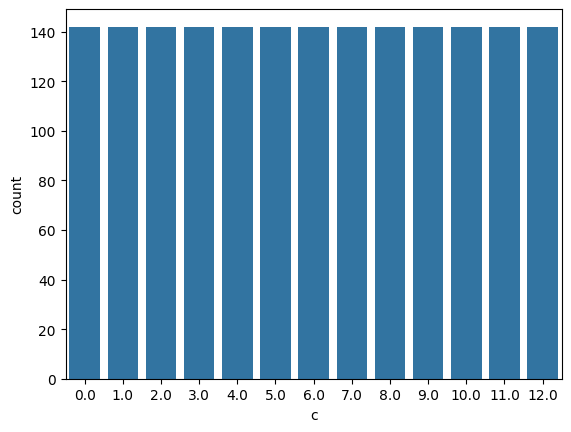

In [127]:
sns.barplot(mystery_df["c"].value_counts().reset_index(), x="c", y="count")

- There seems to be a roughly uniform distribution. Perhaps these samples were uniformly selected based on the category.
- There are between 142 and 143 values for each c value

In [128]:
# sample stats for column i
def column_stats(df: pd.DataFrame, column: str) -> pd.DataFrame:
    data = {
        "mean": [],
        "median": [],
        "var": [],
        "std": [],
        "kurtosis": [],
        "skew": [],
        "max": [],
        "min": [],
    }
    fig, axes = plt.subplots(1, 13, figsize=(18, 6))
    for c in range(13):
        ax = axes[c]
        df_masked = df.loc[df["c"] == c, column]
        ax.hist(df_masked)
        ax.set_title(f"{c=}")
        ax.set_xlabel(column)
        ax.set_ylabel("Count")

        data["mean"].append(df_masked.mean())
        data["median"].append(df_masked.median())
        data["var"].append(df_masked.var())
        data["std"].append(df_masked.std())
        data["kurtosis"].append(df_masked.kurtosis())
        data["skew"].append(df_masked.skew())
        data["max"].append(df_masked.max())
        data["min"].append(df_masked.min())

    fig.set_layout_engine("constrained")

    df_col_stats = pd.DataFrame(data)
    df_col_stats.index.name = "c"
    return df_col_stats

column='x'


mean     median         var        std  kurtosis      skew  \
c                                                                     
0   49.223273  48.293300  281.069988  16.765142 -0.212295  0.286787   
1   49.226100  48.300296  281.227029  16.769825 -1.218337 -0.024390   
2   49.221442  48.029678  281.095333  16.765898 -0.285289  0.245991   
3   49.229927  45.322890  281.231512  16.769959 -0.523658  0.261614   
4   49.220150  42.096458  281.231481  16.769958 -1.355066  0.487862   
5   49.227341  51.494732  281.197993  16.768959 -1.160973  0.083232   
6   49.228805  49.128689  281.122364  16.766704 -0.208228  0.193225   
7   49.220303  45.936768  281.156953  16.767735 -0.827782 -0.125287   
8   49.227320  48.983213  280.898024  16.760013 -0.615411  0.031141   
9   49.228730  48.802088  281.207393  16.769239 -0.194127  0.171898   
10  49.225882  49.221345  281.194420  16.768853 -0.314707  0.234855   
11  49.227849  48.095159  281.124206  16.766759 -0.185287  0.257560   
12  49.226916  59.510226  281.232887  16.770000 -1.719034 -0.328105   

          max        min  
c                         
0   93.165100  17.267700  
1   86.599961  10.520750  
2   93.248123  16.963709  
3   84.464851  25.409654  
4   80.406186  26.066867  
5   81.395897  21.984603  
6   91.040519  12.853499  
7   72.914435  20.403526  
8   80.624761  16.823581  
9   86.695539  14.248205  
10  90.220528  15.169778  
11  90.553416  13.069472  
12  72.875874  22.399632

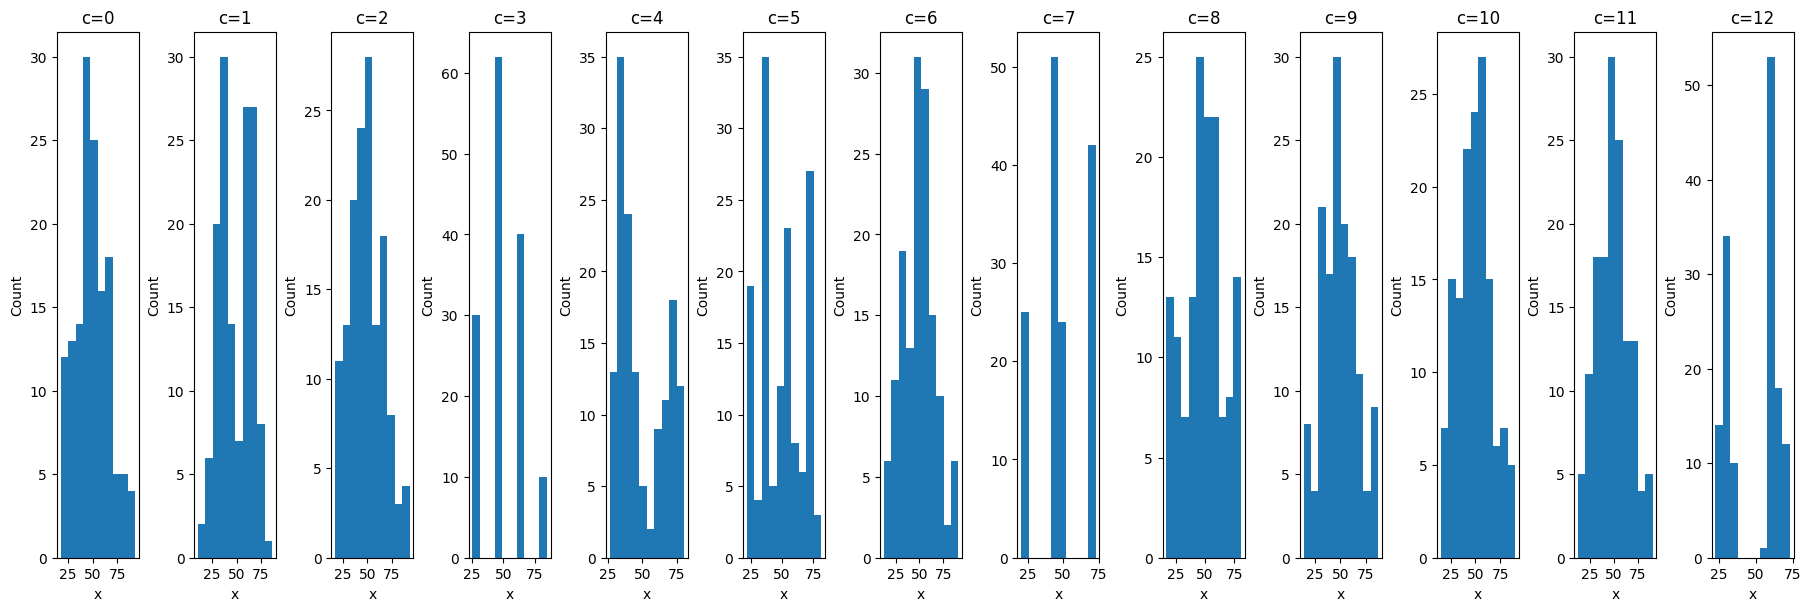

In [129]:
# repeat for each column as needed
column = "x"

print(f"{column=}")
column_stats(mystery_df, column)

- Descriptive stats mean, variance, and standard deviation are (nearly) equal for every c value for each column despite have different shape/trends in scatter plots and different distributions (median)

## Visualization

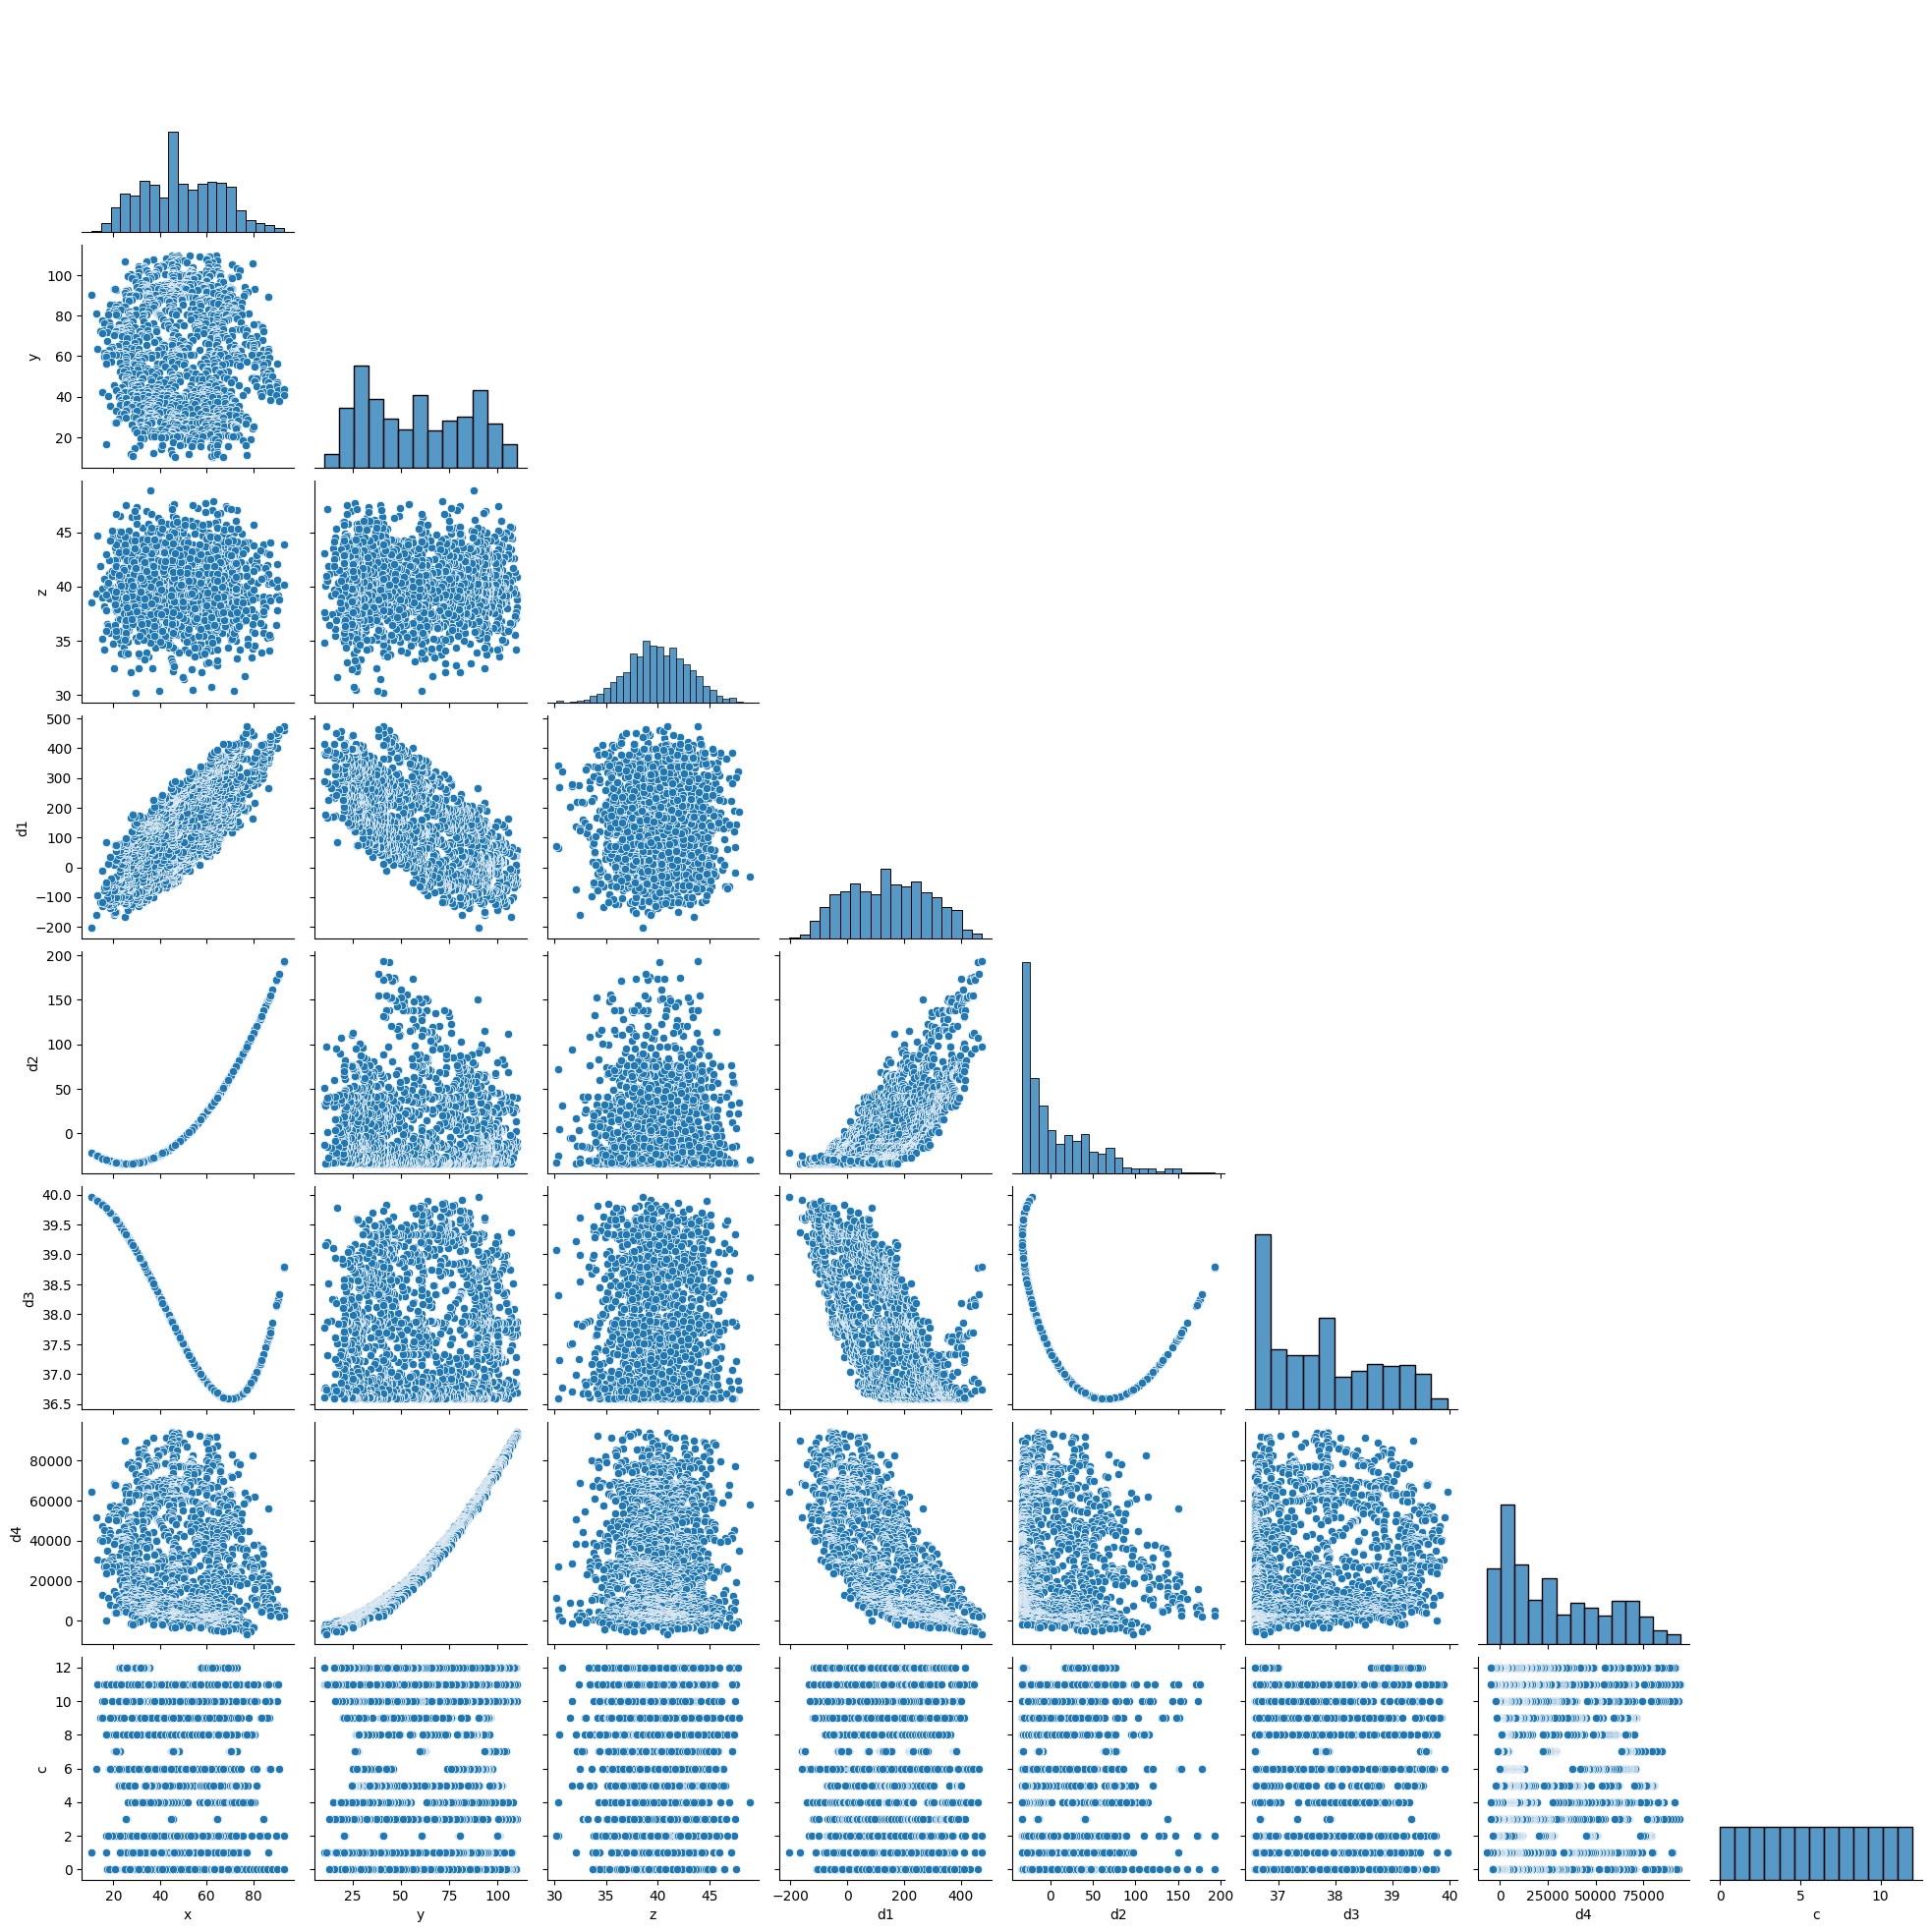

In [130]:
# Pair plot - look for trends
sns.pairplot(mystery_df, corner=True)
plt.show()

- Polynomial relationships appear for x, d2 and x, d3 and y, d4

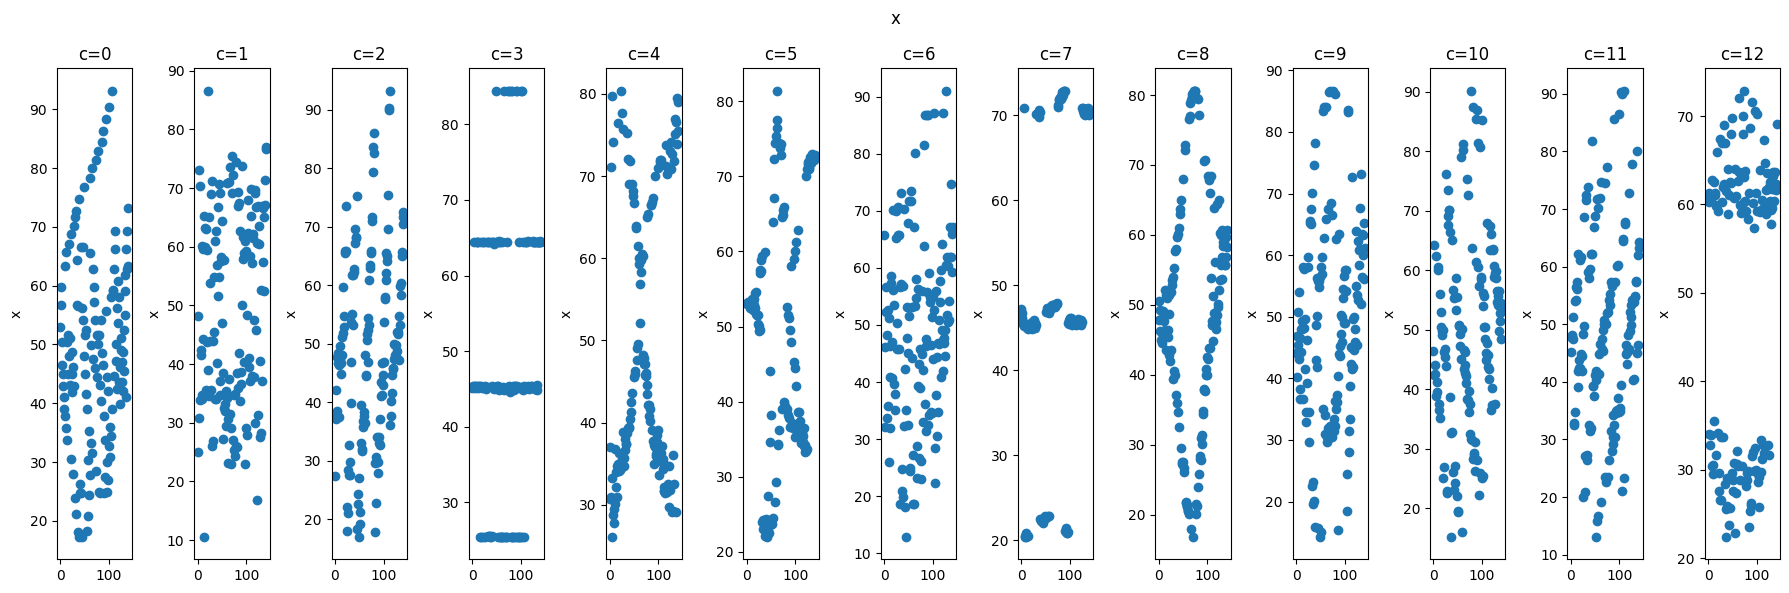

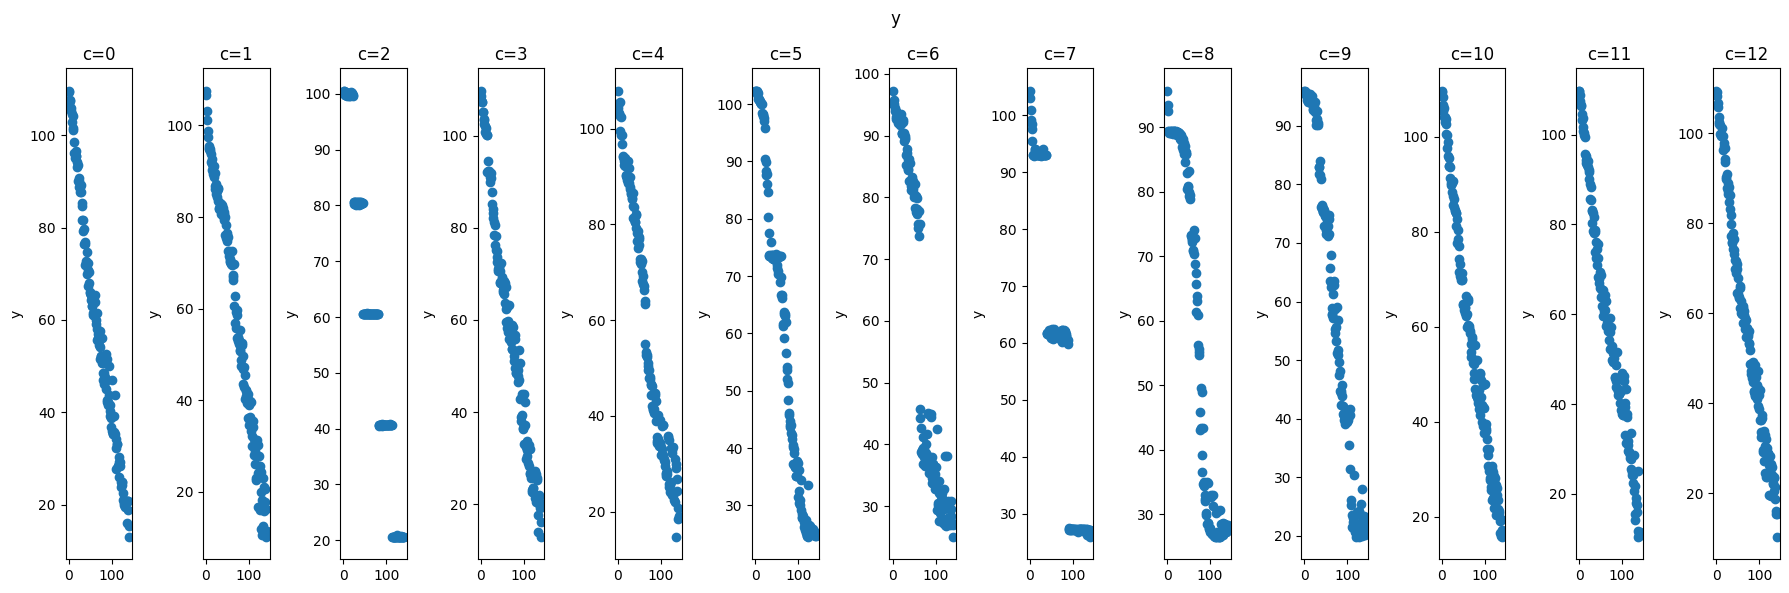

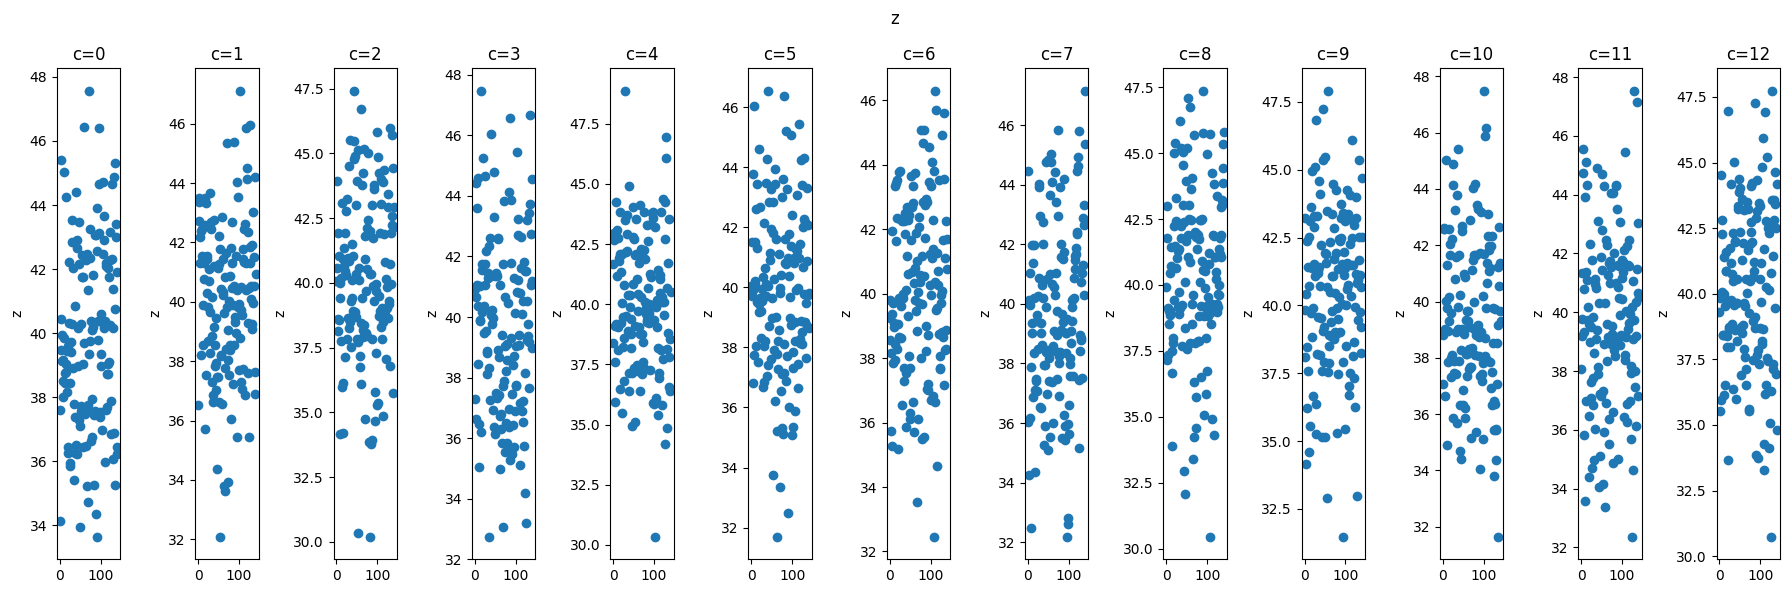

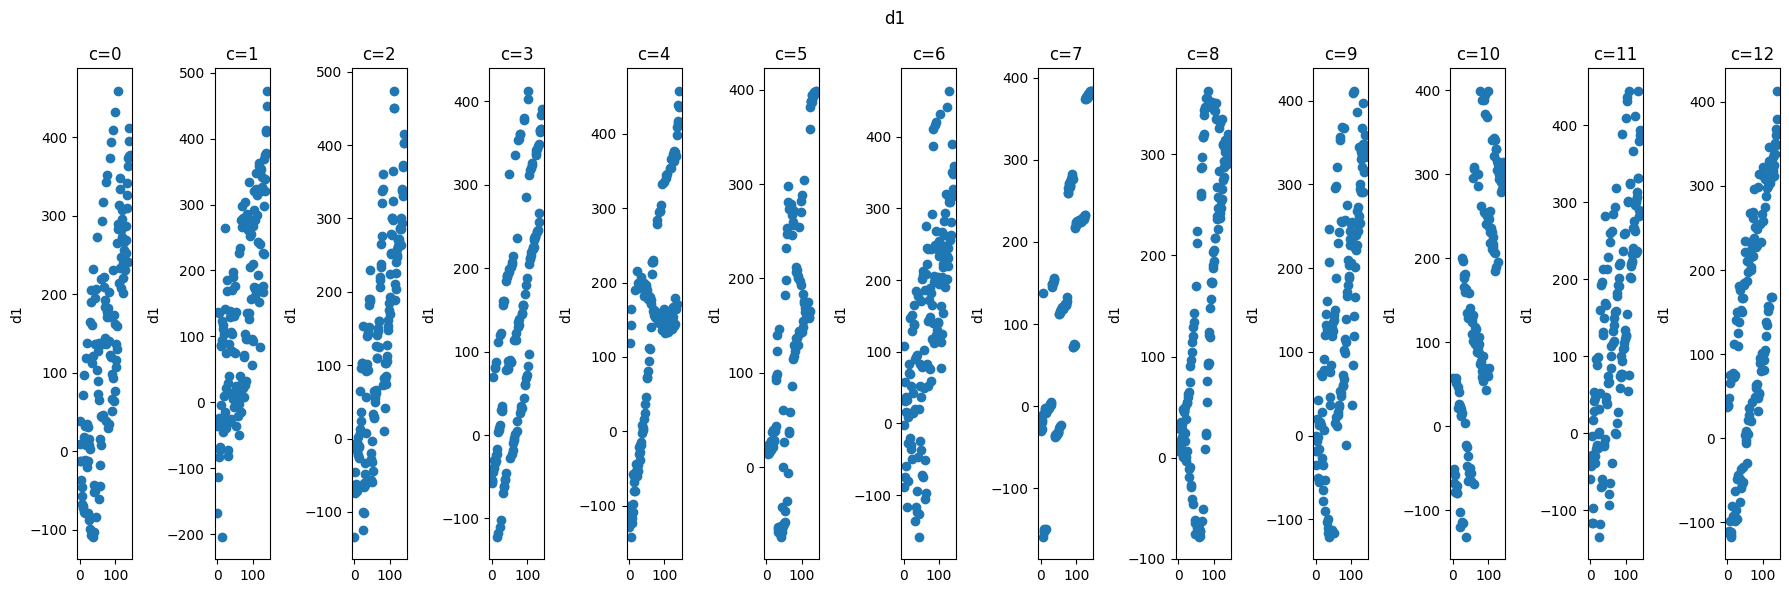

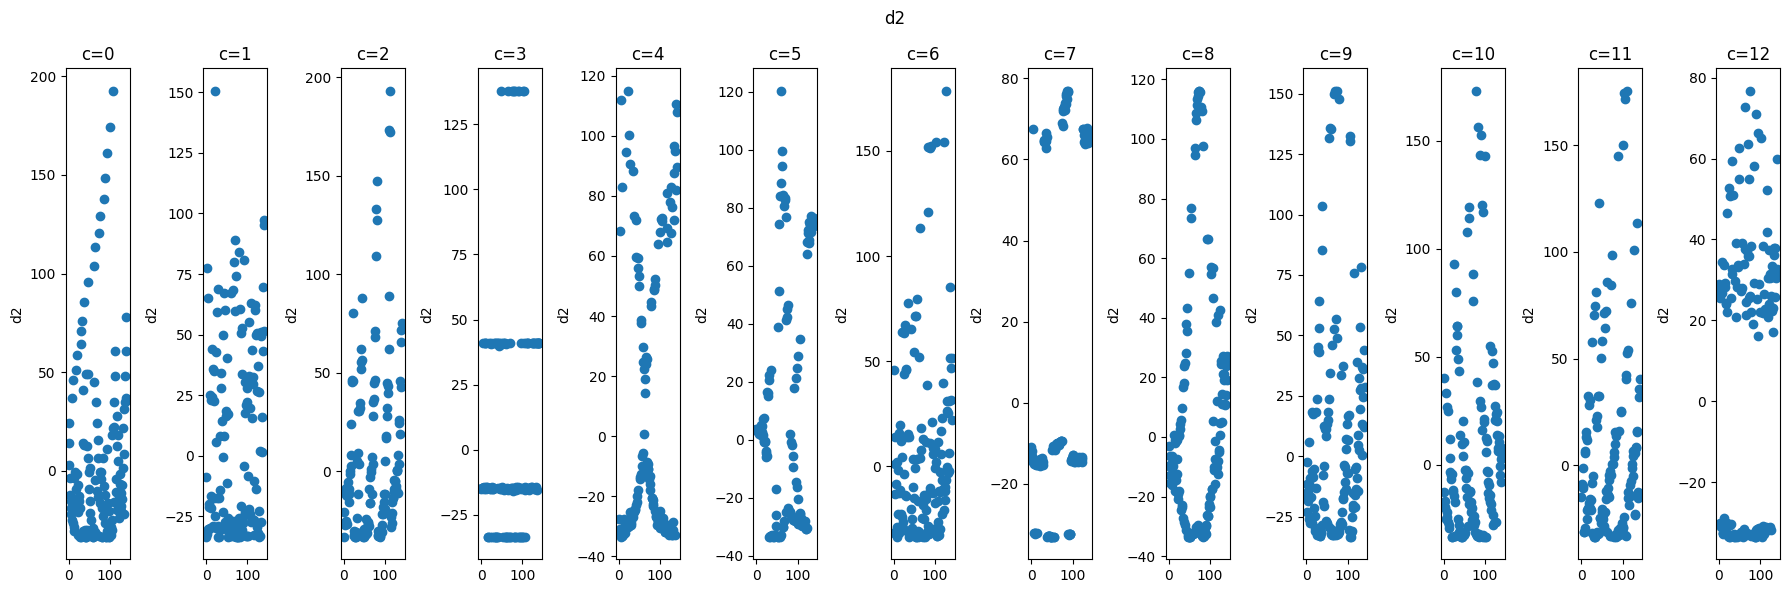

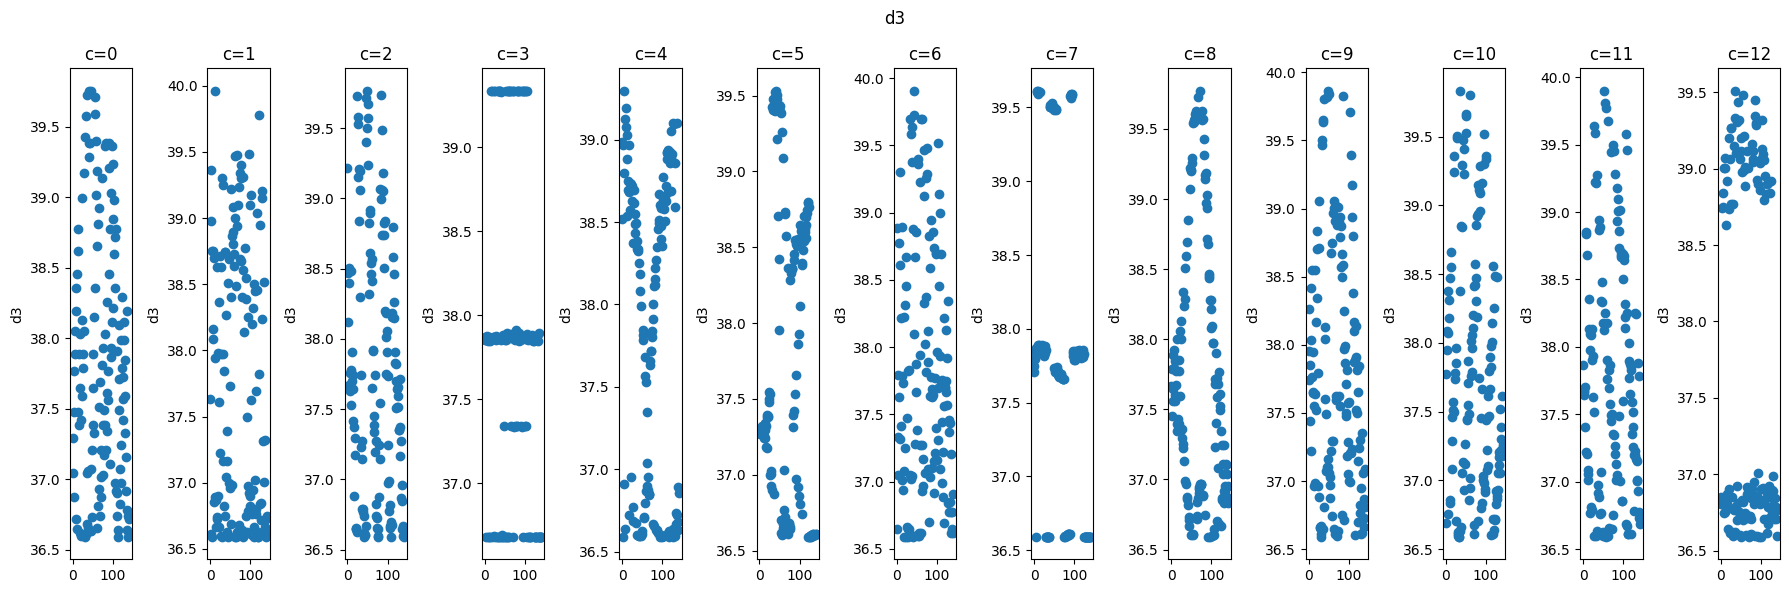

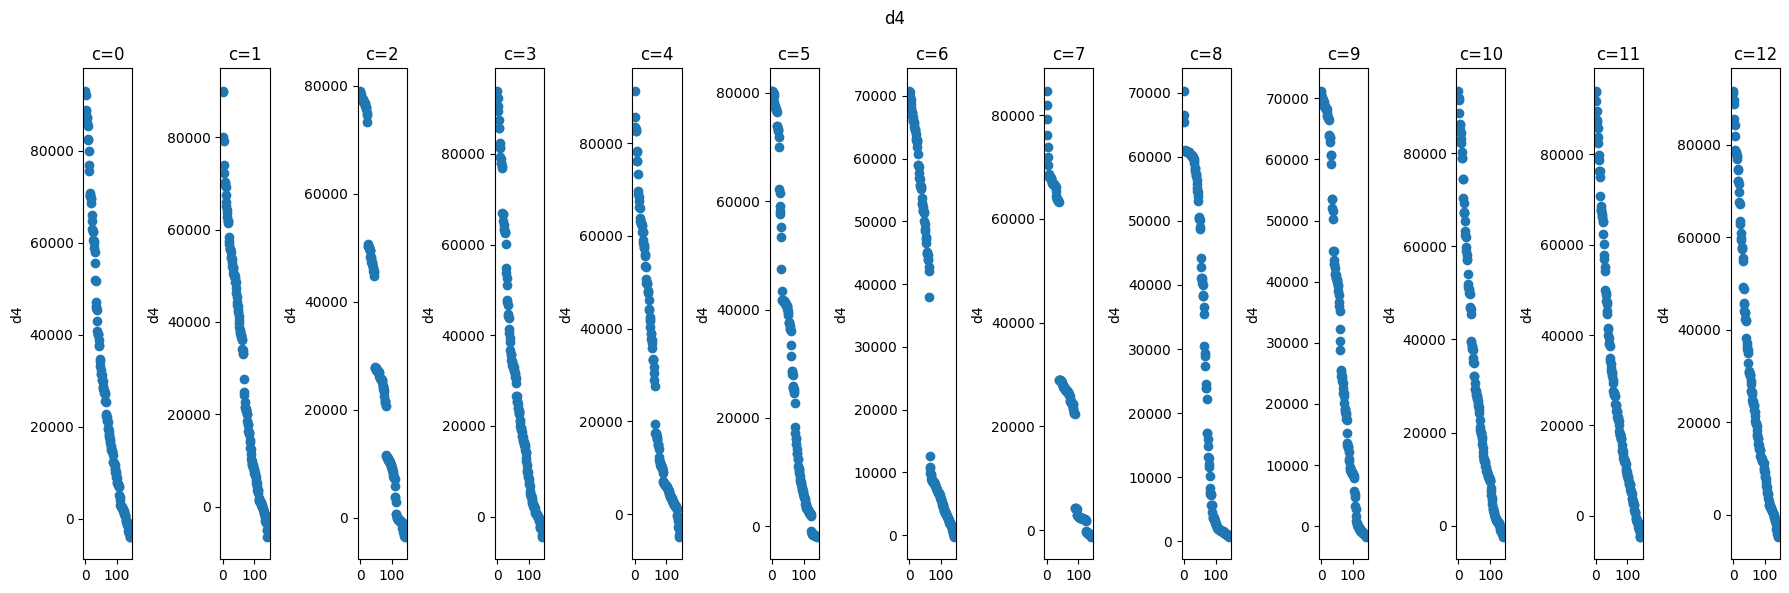

In [131]:
# Plot each column by c value
for column in mystery_df.columns[:-1]:  # x:d4
    fig, axes = plt.subplots(1, 13, figsize=(18, 6))
    for c in range(0, 13):
        mask = mystery_df["c"] == c
        df_masked = mystery_df[mask]
        num_rows = range(df_masked.shape[0])
        ax = axes[c]
        ax.scatter(num_rows, df_masked[column])
        ax.set_title(f"{c=}")
        ax.set_ylabel(column)
    fig.set_layout_engine("tight")
    fig.suptitle(column)

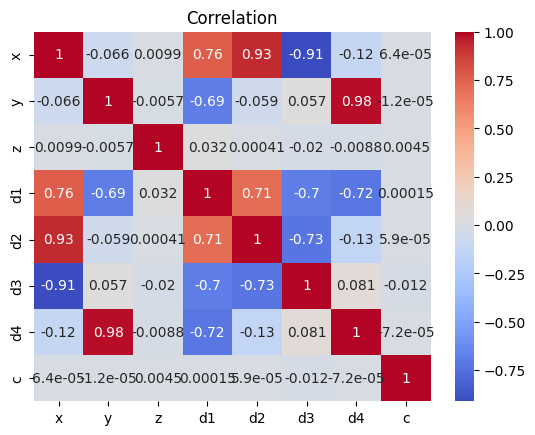

In [132]:
# Pearson correlation
sns.heatmap(mystery_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation")
plt.show()

- x
    - moderate correlation
        - d1
    - strong correlation
        - d2
        - d3
- y
    - moderate correlation
        - d1
    - strong correlation
        - d4
- z
    - no correlation
- d1
    - moderate correlation
        - x
        - y
        - d2
        - d3
        - d4
- d2
    - moderate correlation
        - d1
        - d3
    - strong correlation
        - x
- d3
    - moderate correlation
        - d1
        - d2
    - strong correlation
        - x
- d4
    - moderate correlation
        - d1
    - strong correlation
        - y

In [133]:
# R**2 correlation for specific c
def r2_map(df: pd.DataFrame, c: int) -> None:
    mask = df["c"] == c
    df_masked = df[mask].drop("c", axis=1)
    sns.heatmap(df_masked.corr() ** 2, annot=True, cmap="coolwarm")
    plt.title(f"R**2 for {c=}")
    plt.tight_layout()
    plt.show()

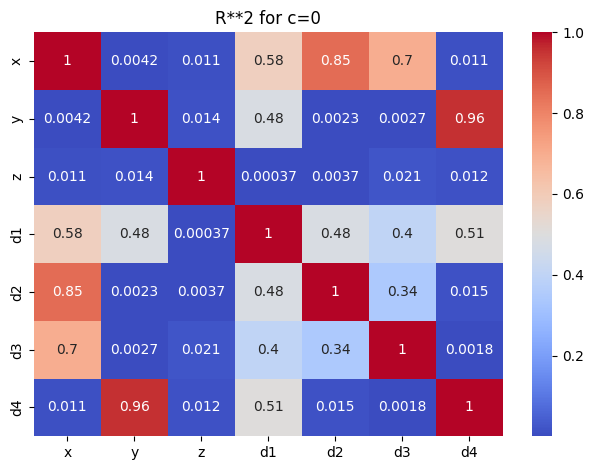

In [134]:
# repeat as needed for each c
r2_map(mystery_df, 0)

In [135]:
# Summarize strong relationships in df for R**2
r2_data = {
    "x_d2": [],  # x, d2
    "x_d3": [],  # x, d3
    "y_d4": [],  # y, d4
}
for c in range(13):
    mask = mystery_df["c"] == c
    df_masked = mystery_df[mask].drop("c", axis=1)
    r2 = df_masked.corr() ** 2
    r2_data["x_d2"].append(r2.loc["x", "d2"])
    r2_data["x_d3"].append(r2.loc["x", "d3"])
    r2_data["y_d4"].append(r2.loc["y", "d4"])
df_r2 = pd.DataFrame(r2_data)
df_r2.index.name = "c"
df_r2

x_d2      x_d3      y_d4
c                               
0   0.849774  0.699259  0.955373
1   0.907408  0.940447  0.958771
2   0.850181  0.708740  0.955630
3   0.870434  0.783360  0.953821
4   0.962528  0.943684  0.969122
5   0.908636  0.948392  0.971677
6   0.838045  0.728092  0.986277
7   0.861515  0.977748  0.967844
8   0.854055  0.885456  0.981624
9   0.834382  0.765196  0.964745
10  0.851085  0.755194  0.955213
11  0.844162  0.717816  0.947035
12  0.969181  0.990068  0.958304

In [136]:
# maximum R**2 correlation
for column in df_r2.columns:
    print(f"{column=}, {df_r2[column].max()=}, {df_r2[column].idxmax()=}")

column='x_d2', df_r2[column].max()=np.float64(0.9691814705803765), df_r2[column].idxmax()=12
column='x_d3', df_r2[column].max()=np.float64(0.9900676140956702), df_r2[column].idxmax()=12
column='y_d4', df_r2[column].max()=np.float64(0.9862773170300083), df_r2[column].idxmax()=6


- R**2 varies for c for the strongly correlated pairs, staying above .90 only for y, d4
- Strongest R**2 observed for c=6 and c=12

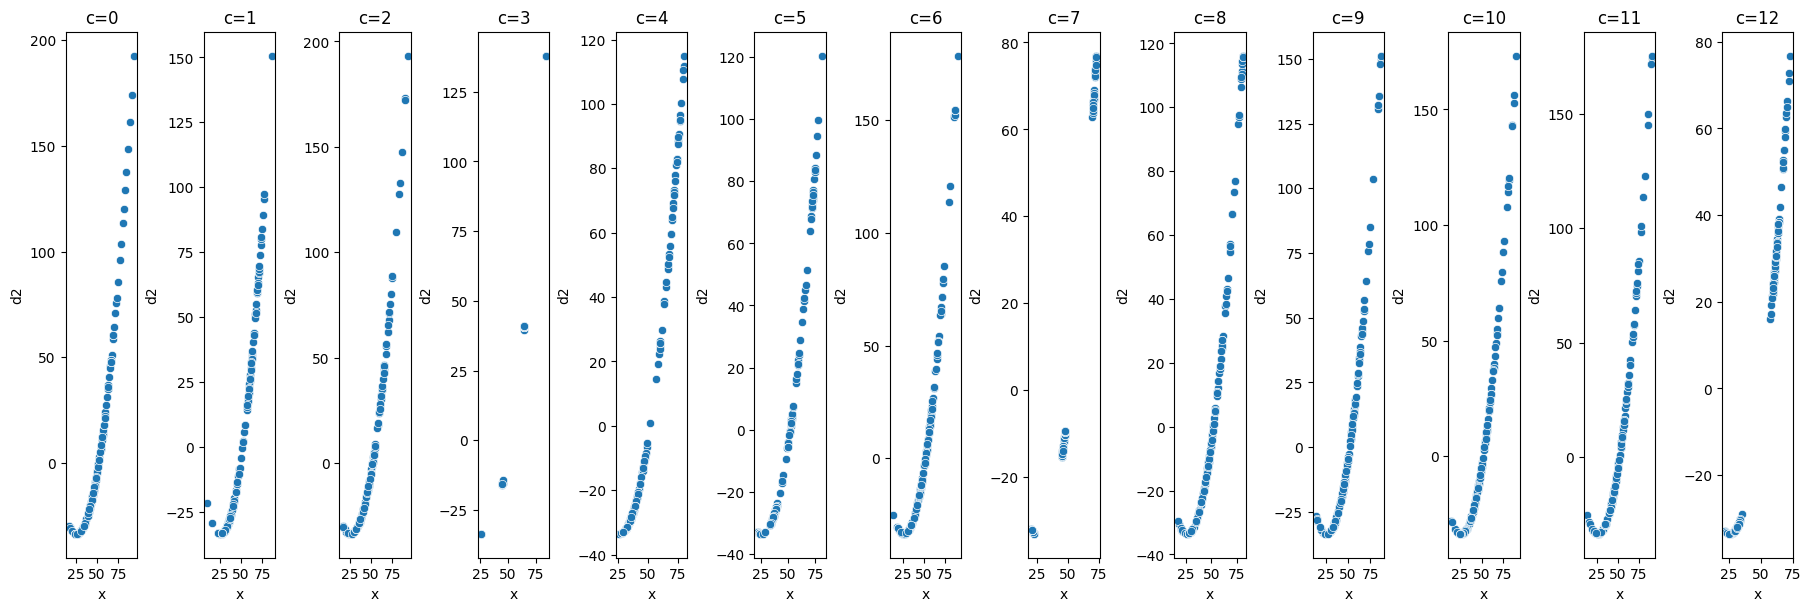

In [ ]:
# Plot strongly correlated x, y
## change as needed
x = "x"
y = "d2"

fig, axes = plt.subplots(1, 13, figsize=(18, 6))
for c in range(13):
    mask = mystery_df["c"] == c
    df_masked = mystery_df[mask]
    sns.scatterplot(data=df_masked, x=x, y=y, ax=axes[c])
    axes[c].set_xlabel(x)
    axes[c].set_ylabel(y)
    axes[c].set_title(f"{c=}")
fig.set_layout_engine("constrained")

- Gaps exist by c-value, the trend is not clear for every c value
- Polynomial model regression will not attempted for these relationships, instead will focus on classifier models

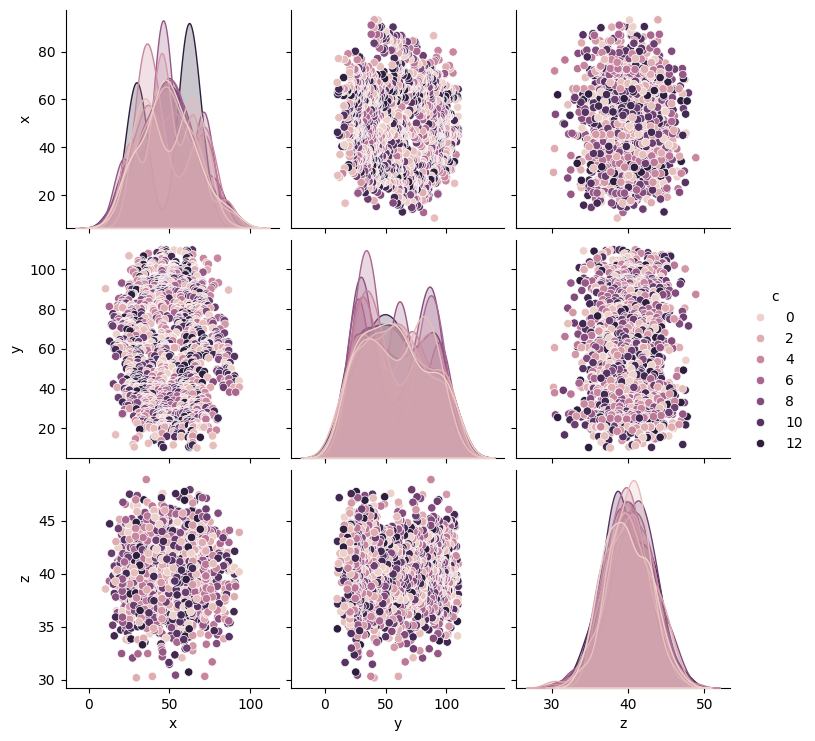

In [138]:
# Are there (distinguishable) clusters of c?
sns.pairplot(mystery_df, hue="c", vars=["x", "y", "z"])
plt.show()

- Clustering by c value not very useful at the moment for columns x, y, z

### Visualization by c Value

In [139]:
# Function to plot any two column variables by c value
def plot_c(df: pd.DataFrame, x: str, y: str, c: int) -> None:
    """Plots column x, y for specified c"""
    if c < 0 or c > 12:
        raise Exception(f"{c=} invalid!")

    mask = df["c"] == c
    df_masked = df[mask]
    plt.figure()
    sns.scatterplot(data=df_masked, x=x, y=y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{c=}")
    plt.tight_layout()

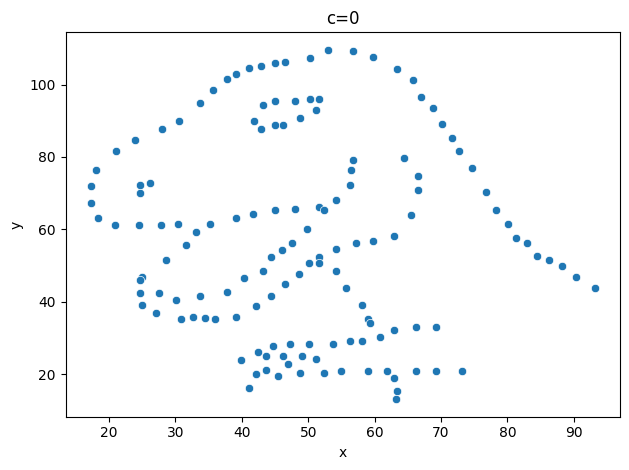

In [140]:
plot_c(mystery_df, "x", "y", c=0)

- As observed in the pair plots, (scatter) plotting certain columns by c value reveals shapes
- The shapes appear multiple times unique to each c value, further supporting hypothesis that c is a categorical variable

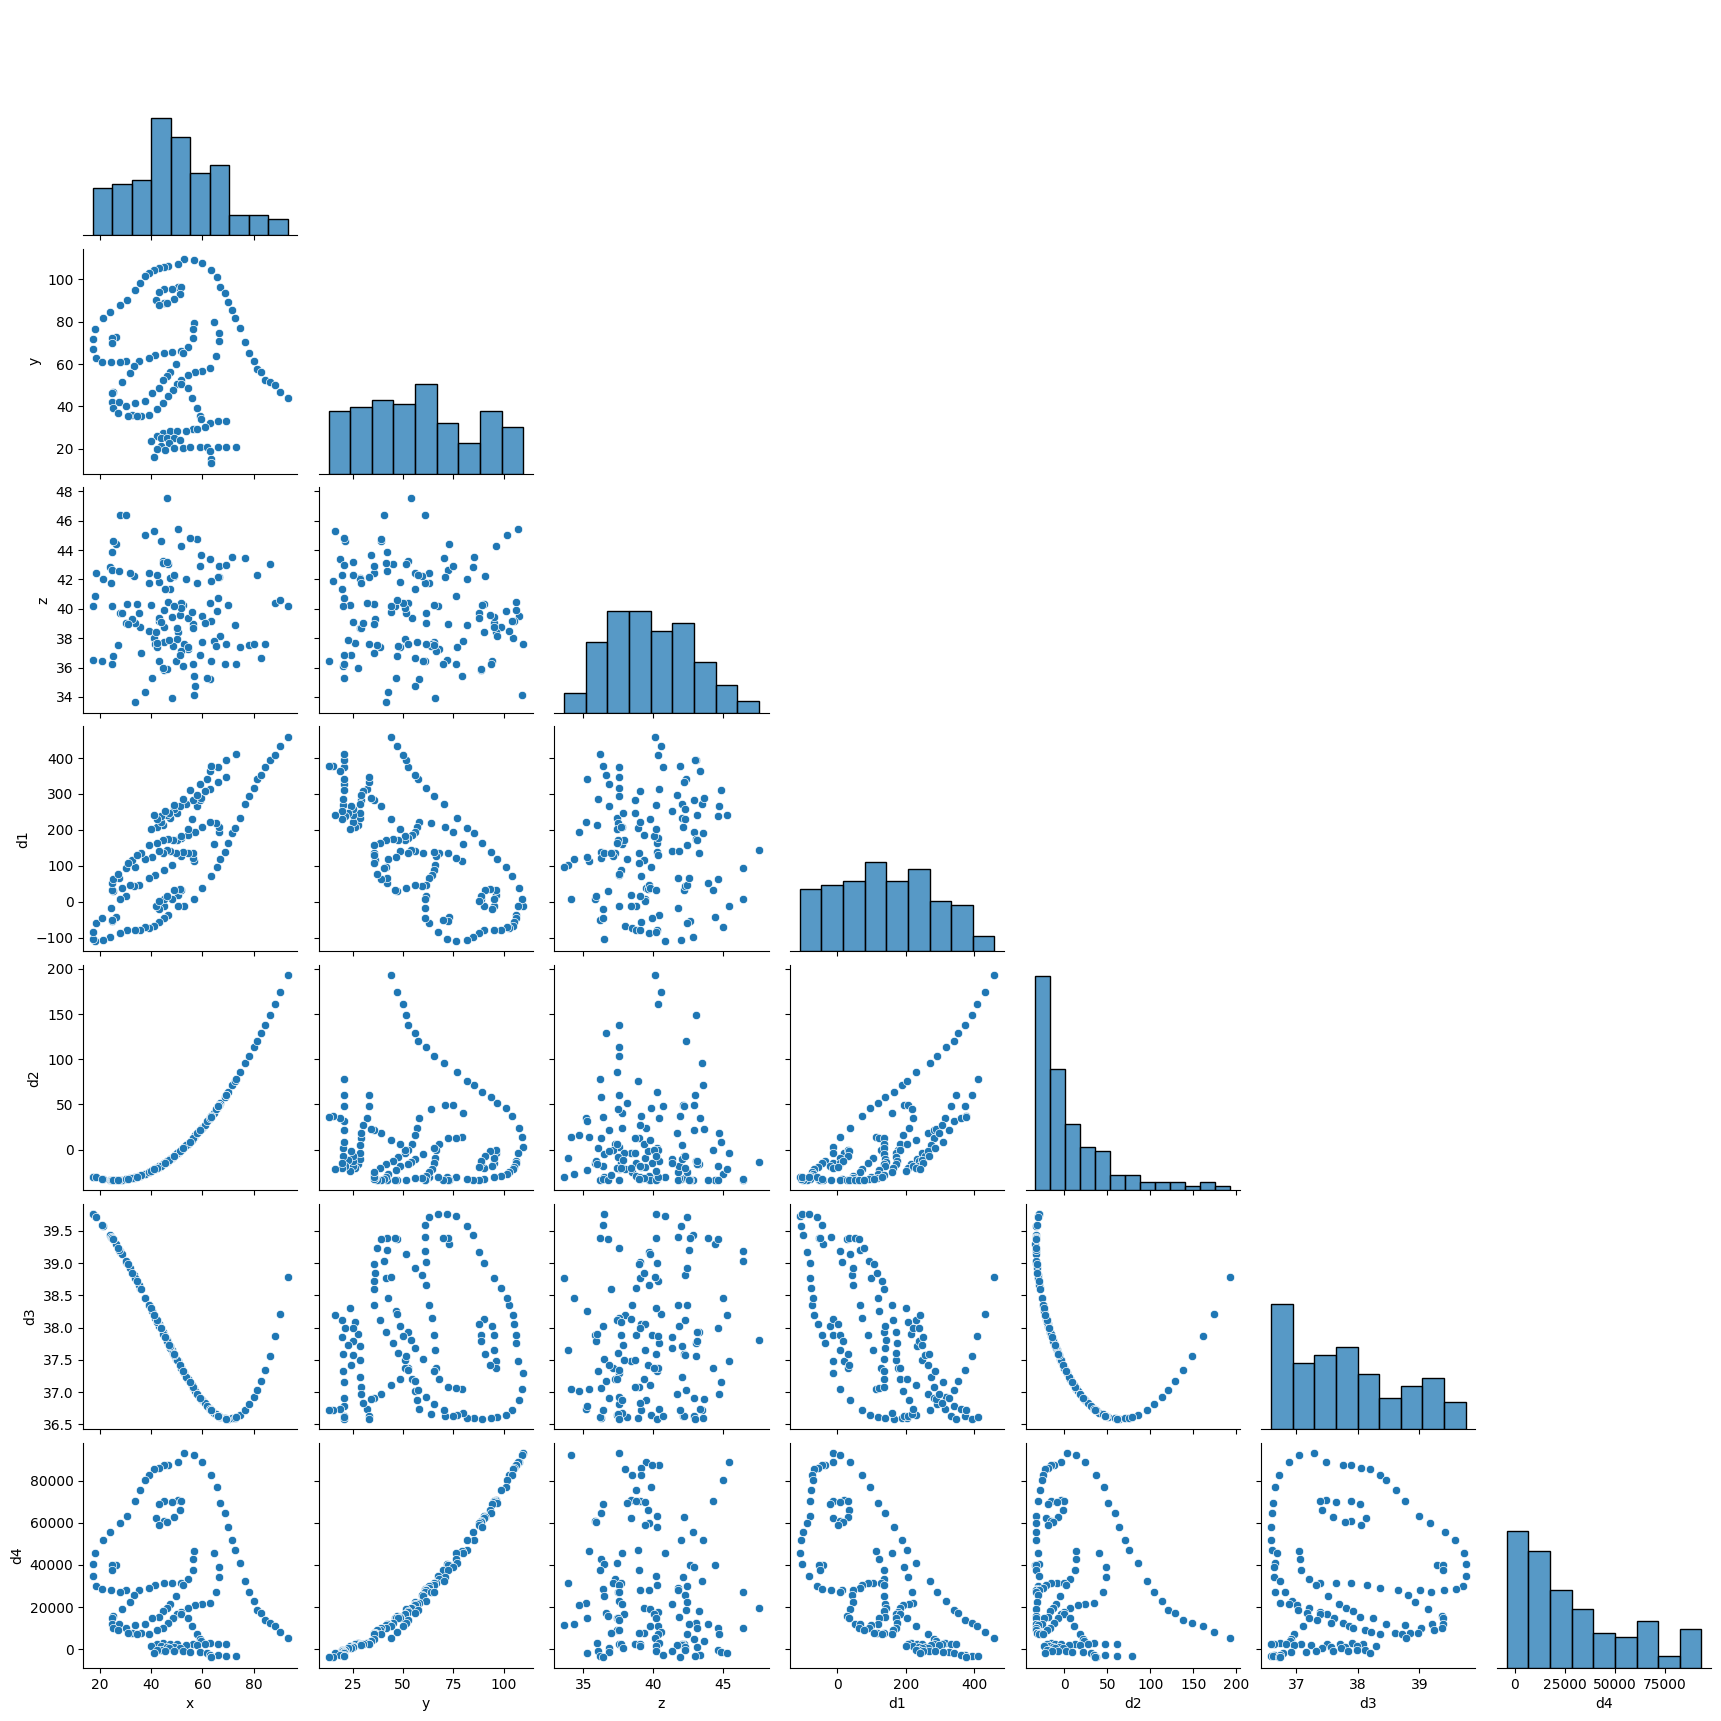

In [141]:
# Look for trends by c value, c=0
sns.pairplot(
    mystery_df[mystery_df["c"] == 0],
    vars=["x", "y", "z", "d1", "d2", "d3", "d4"],
    corner=True,
)

- c=0 is a dinosaur

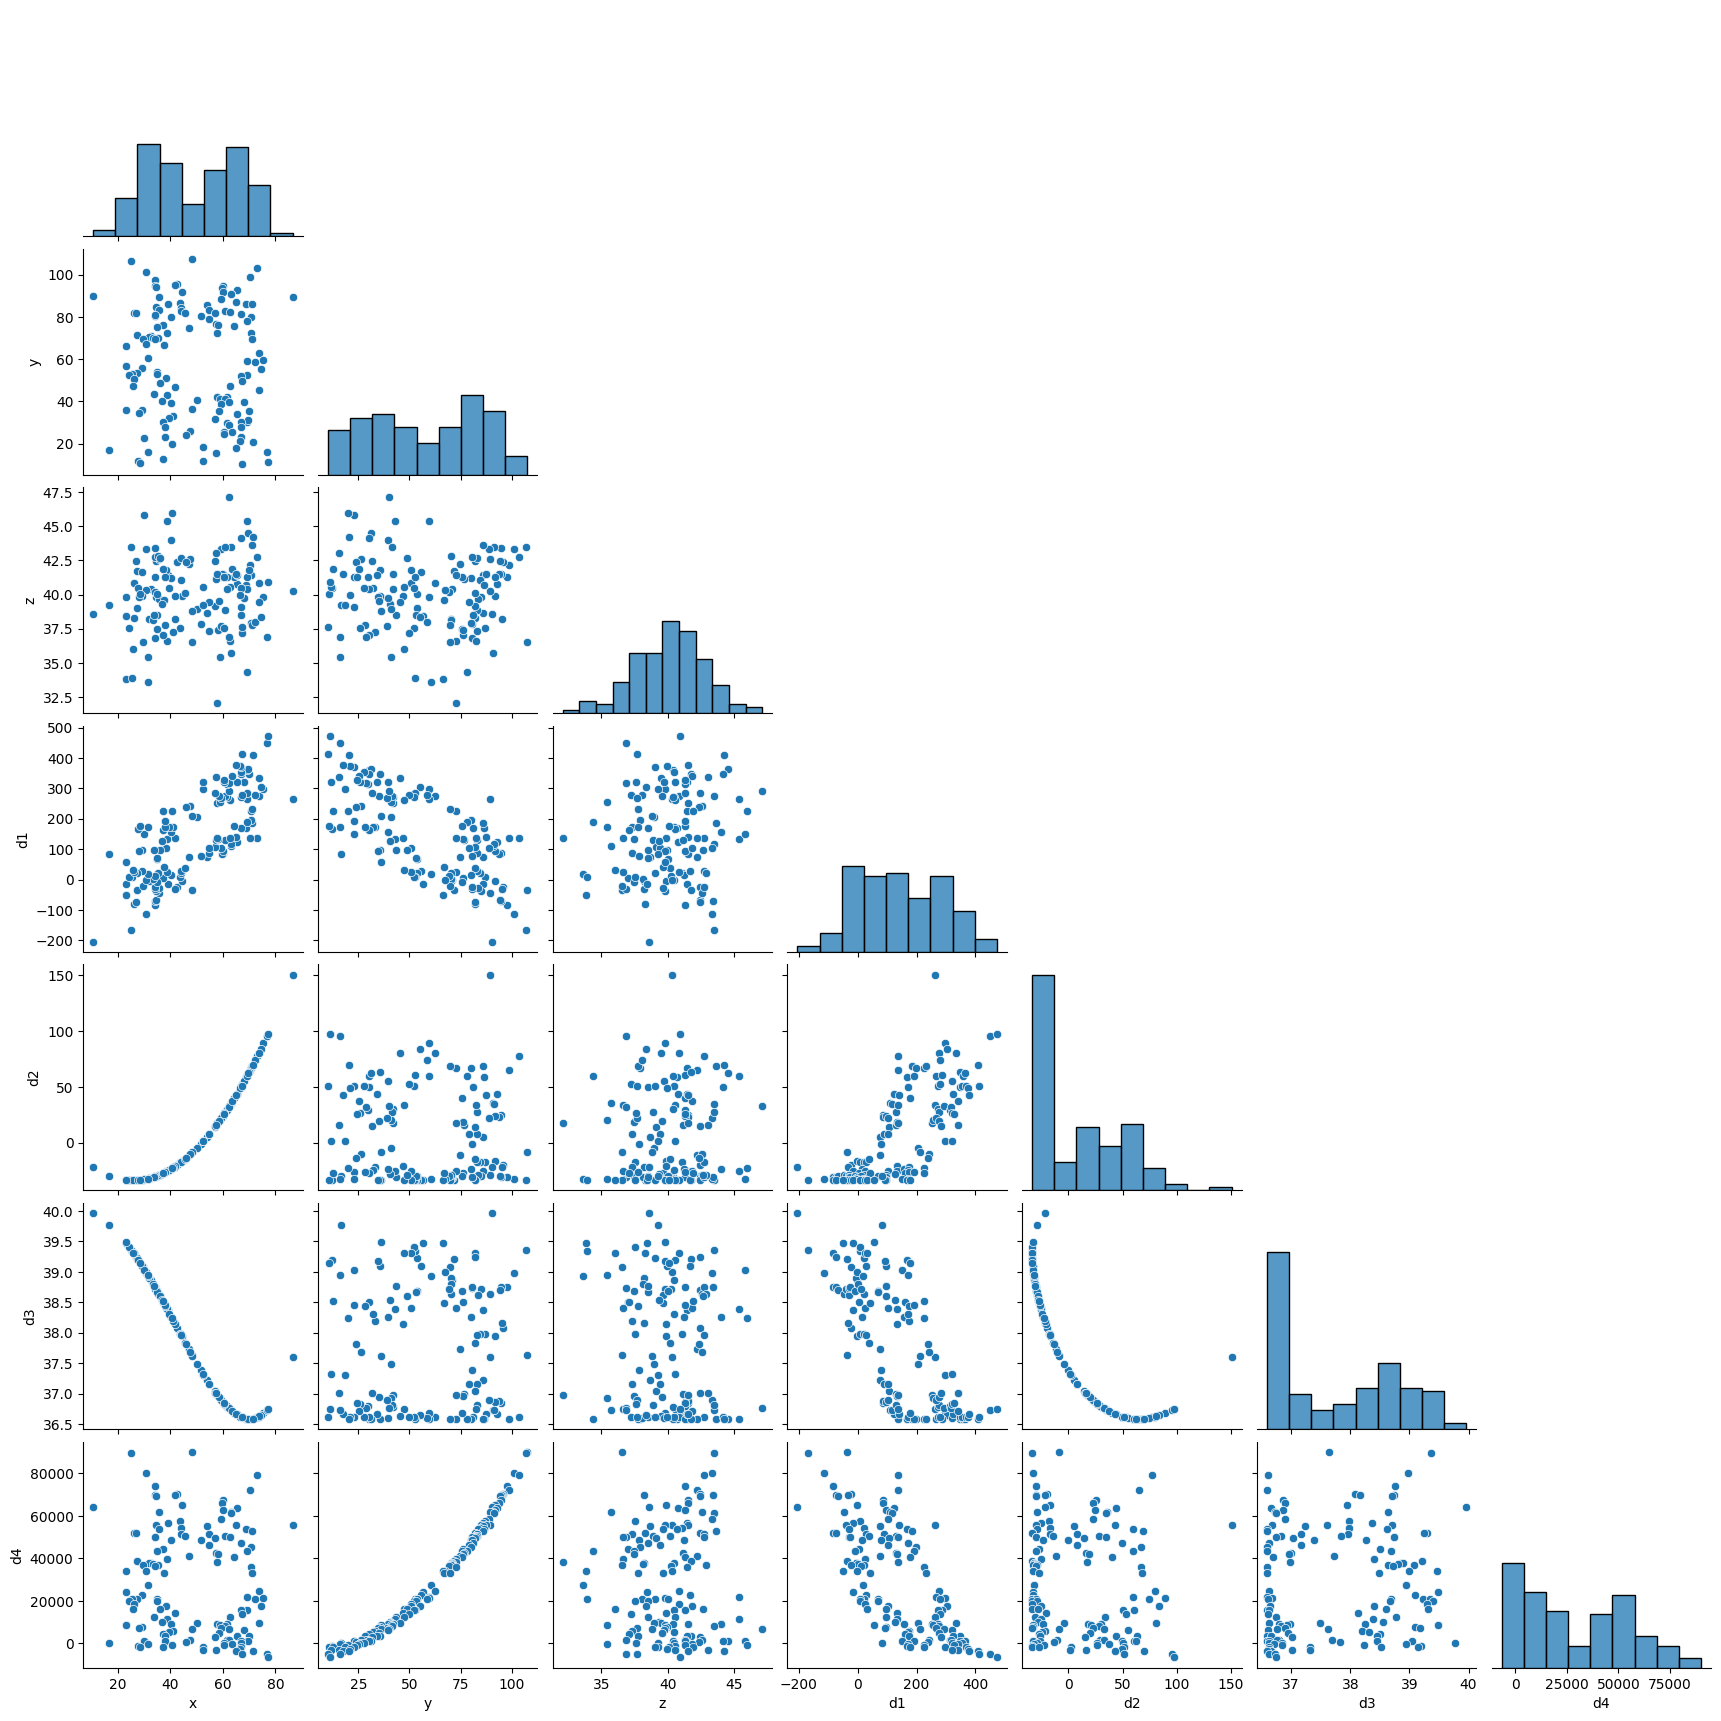

In [142]:
# c=1
sns.pairplot(
    mystery_df[mystery_df["c"] == 1],
    vars=["x", "y", "z", "d1", "d2", "d3", "d4"],
    corner=True,
)

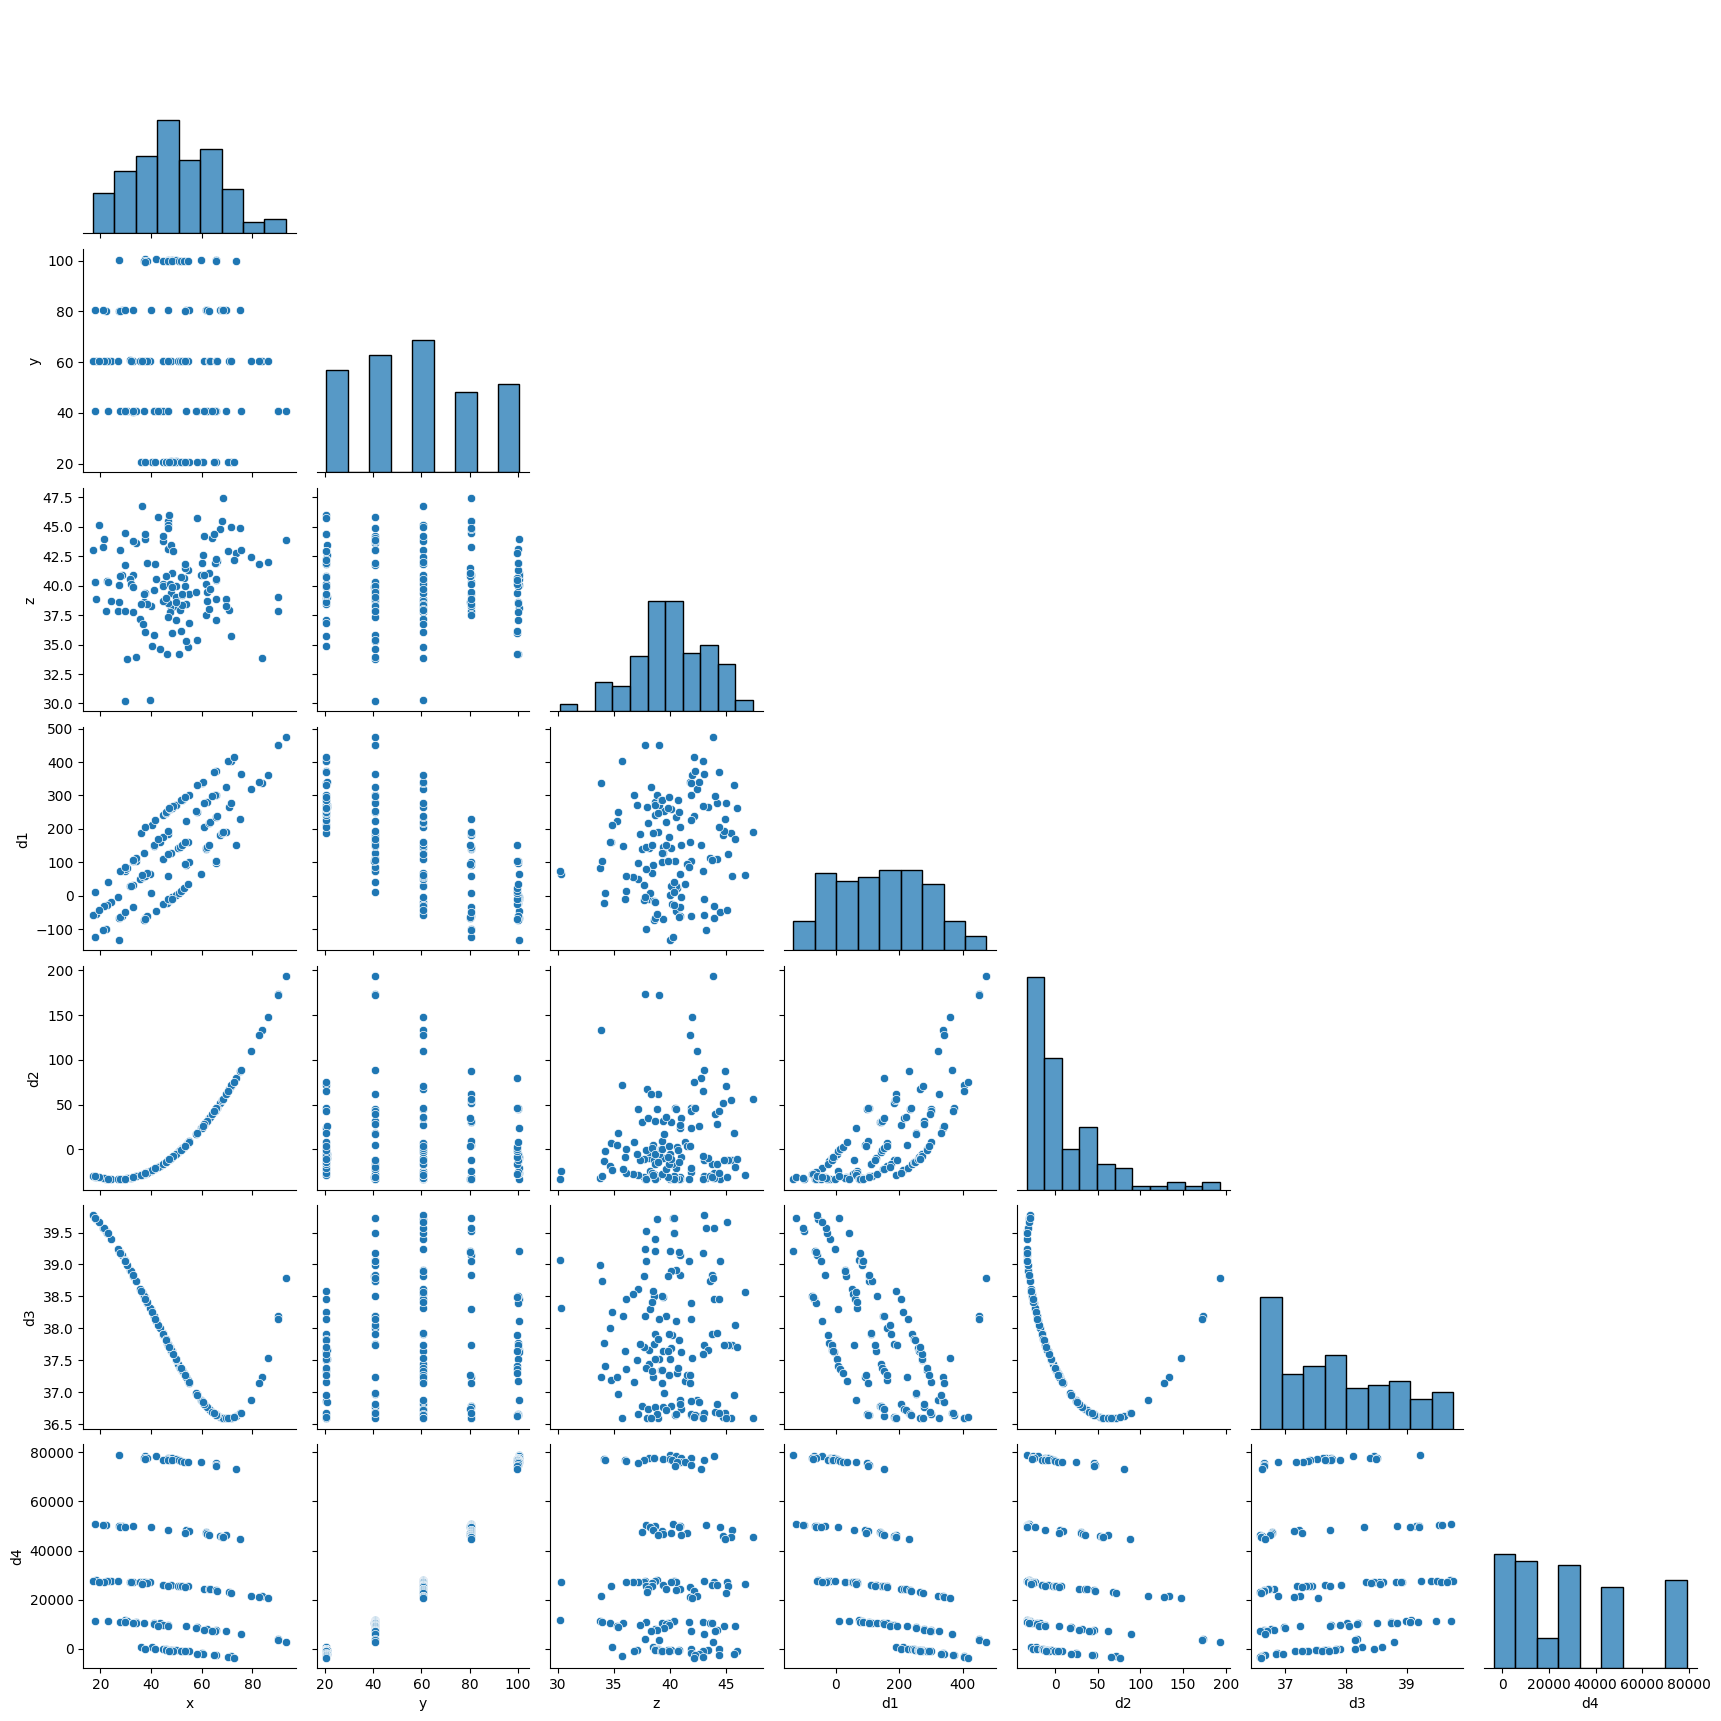

In [143]:
# c=2
sns.pairplot(
    mystery_df[mystery_df["c"] == 2],
    vars=["x", "y", "z", "d1", "d2", "d3", "d4"],
    corner=True,
)

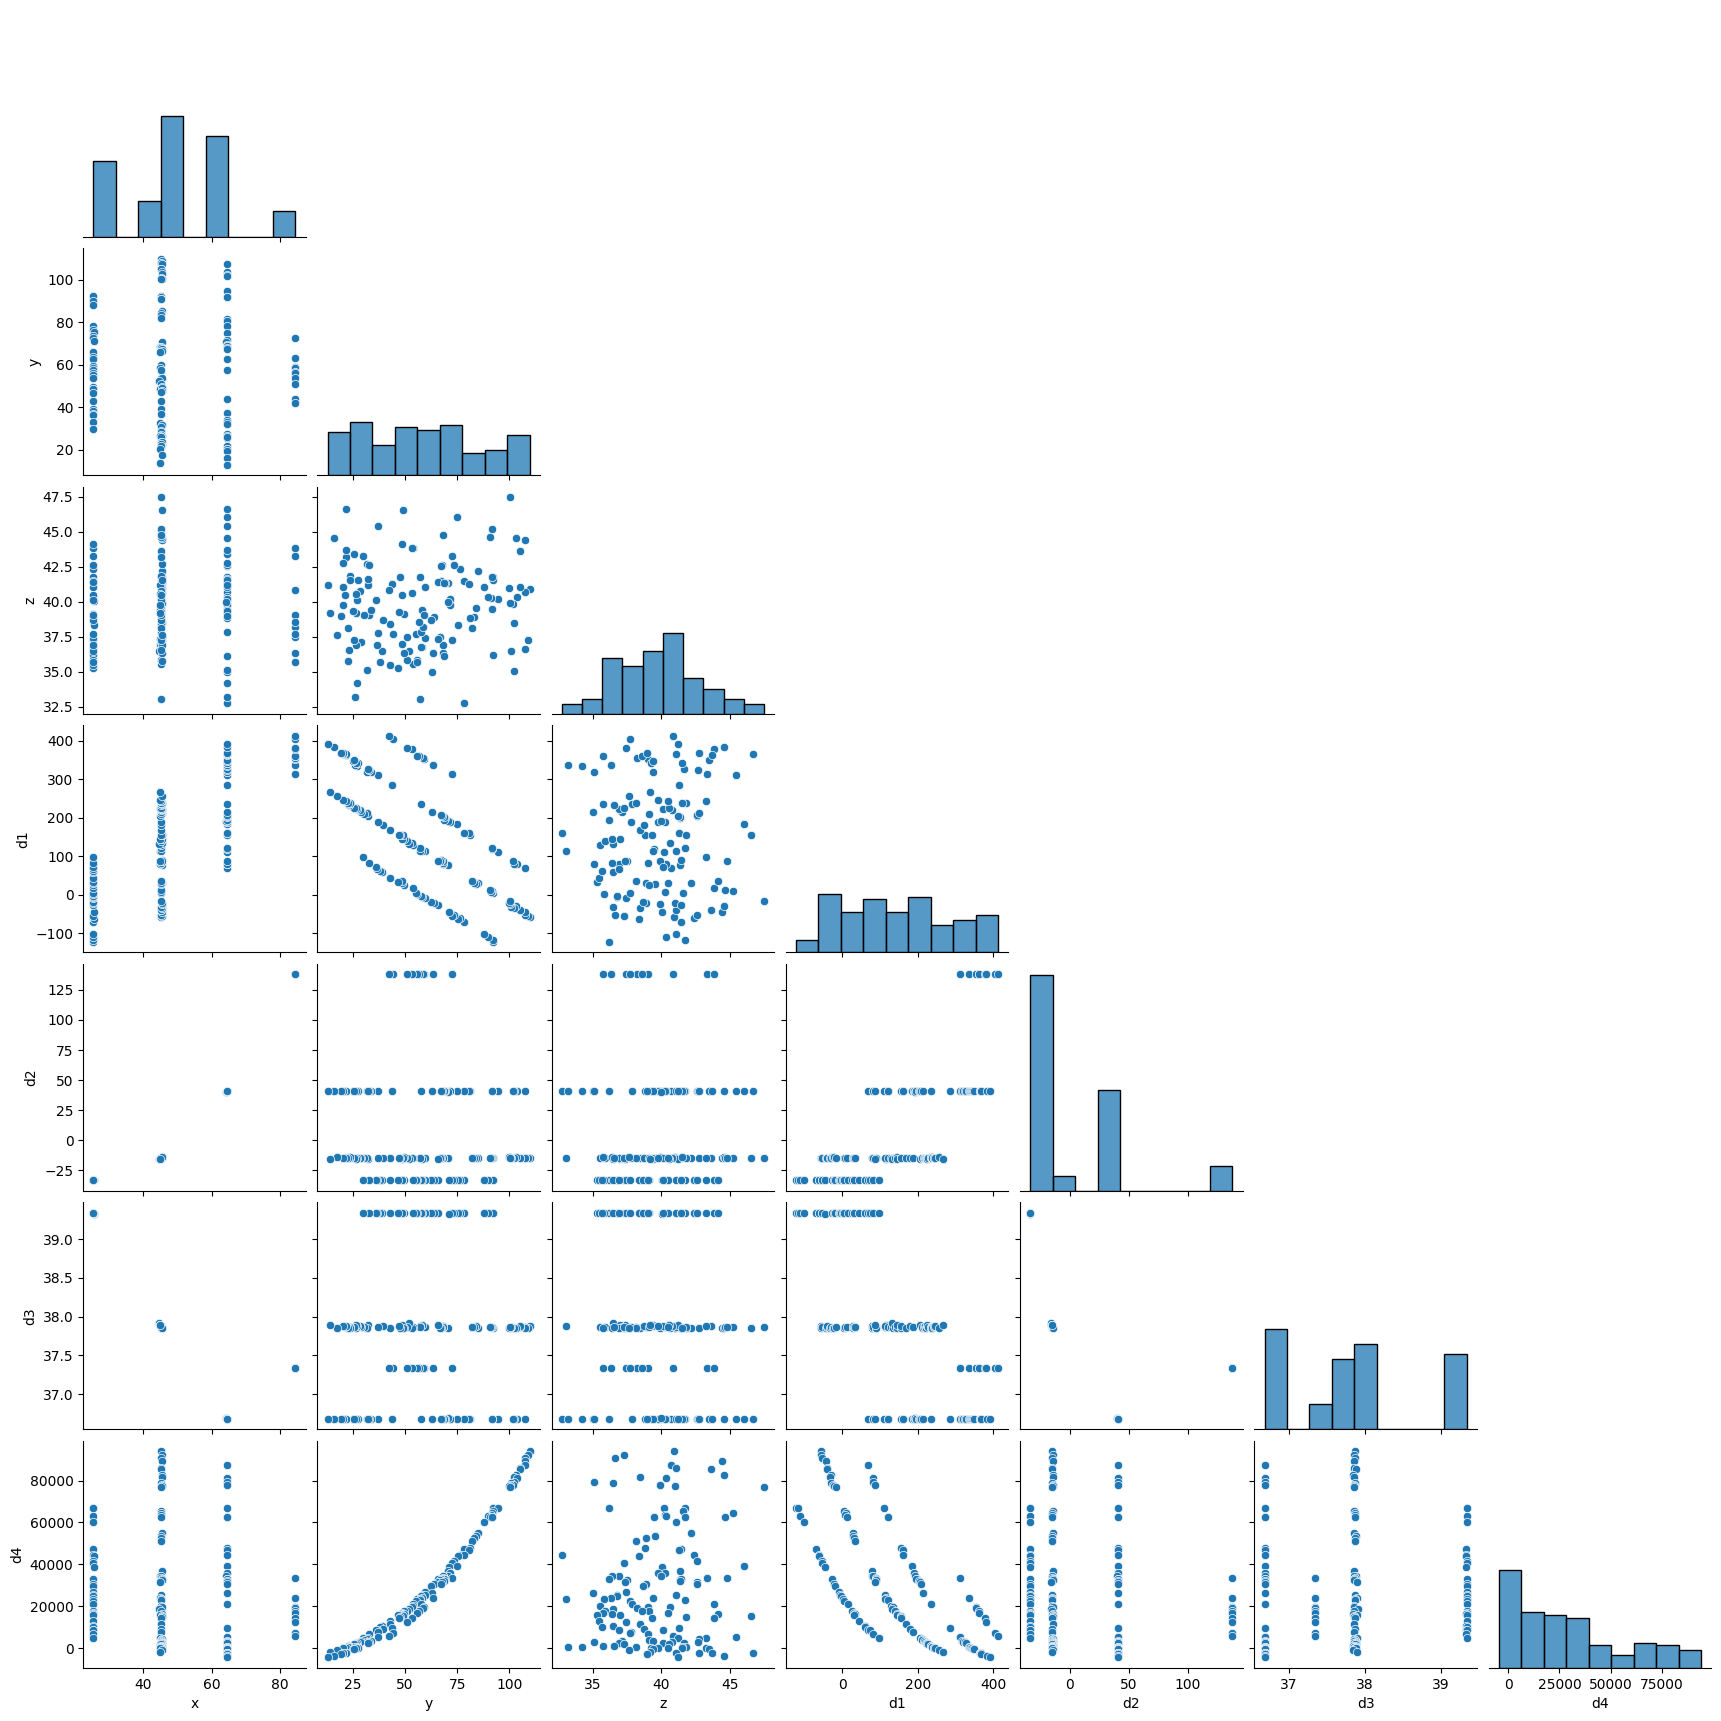

In [144]:
# c=3
sns.pairplot(
    mystery_df[mystery_df["c"] == 3],
    vars=["x", "y", "z", "d1", "d2", "d3", "d4"],
    corner=True,
)

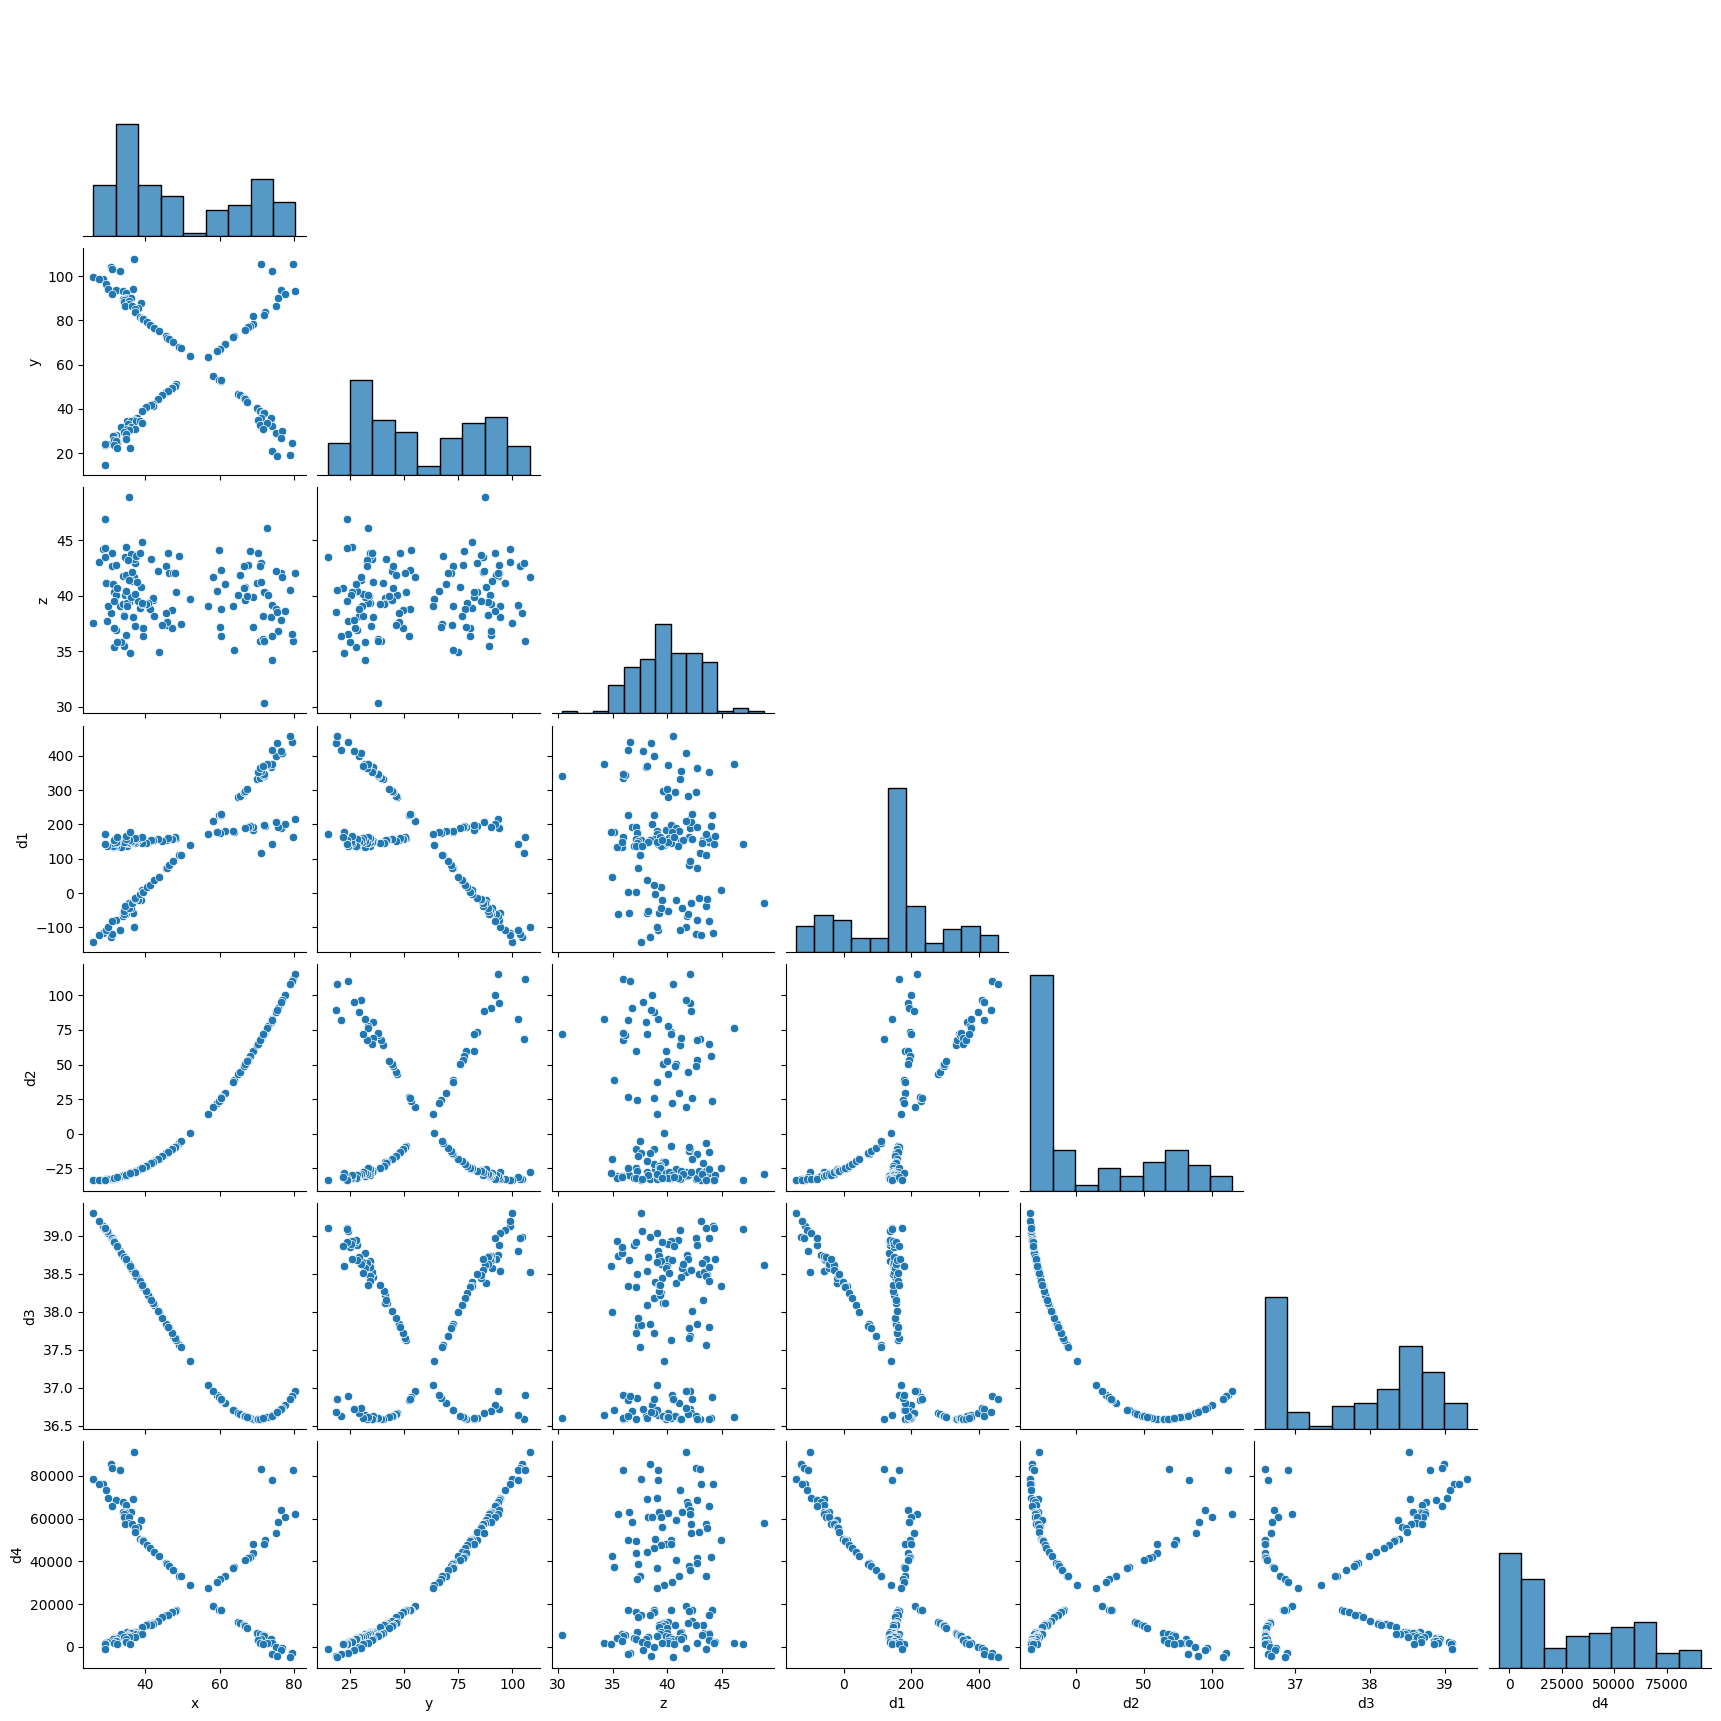

In [145]:
# c=4
sns.pairplot(
    mystery_df[mystery_df["c"] == 4],
    vars=["x", "y", "z", "d1", "d2", "d3", "d4"],
    corner=True,
)

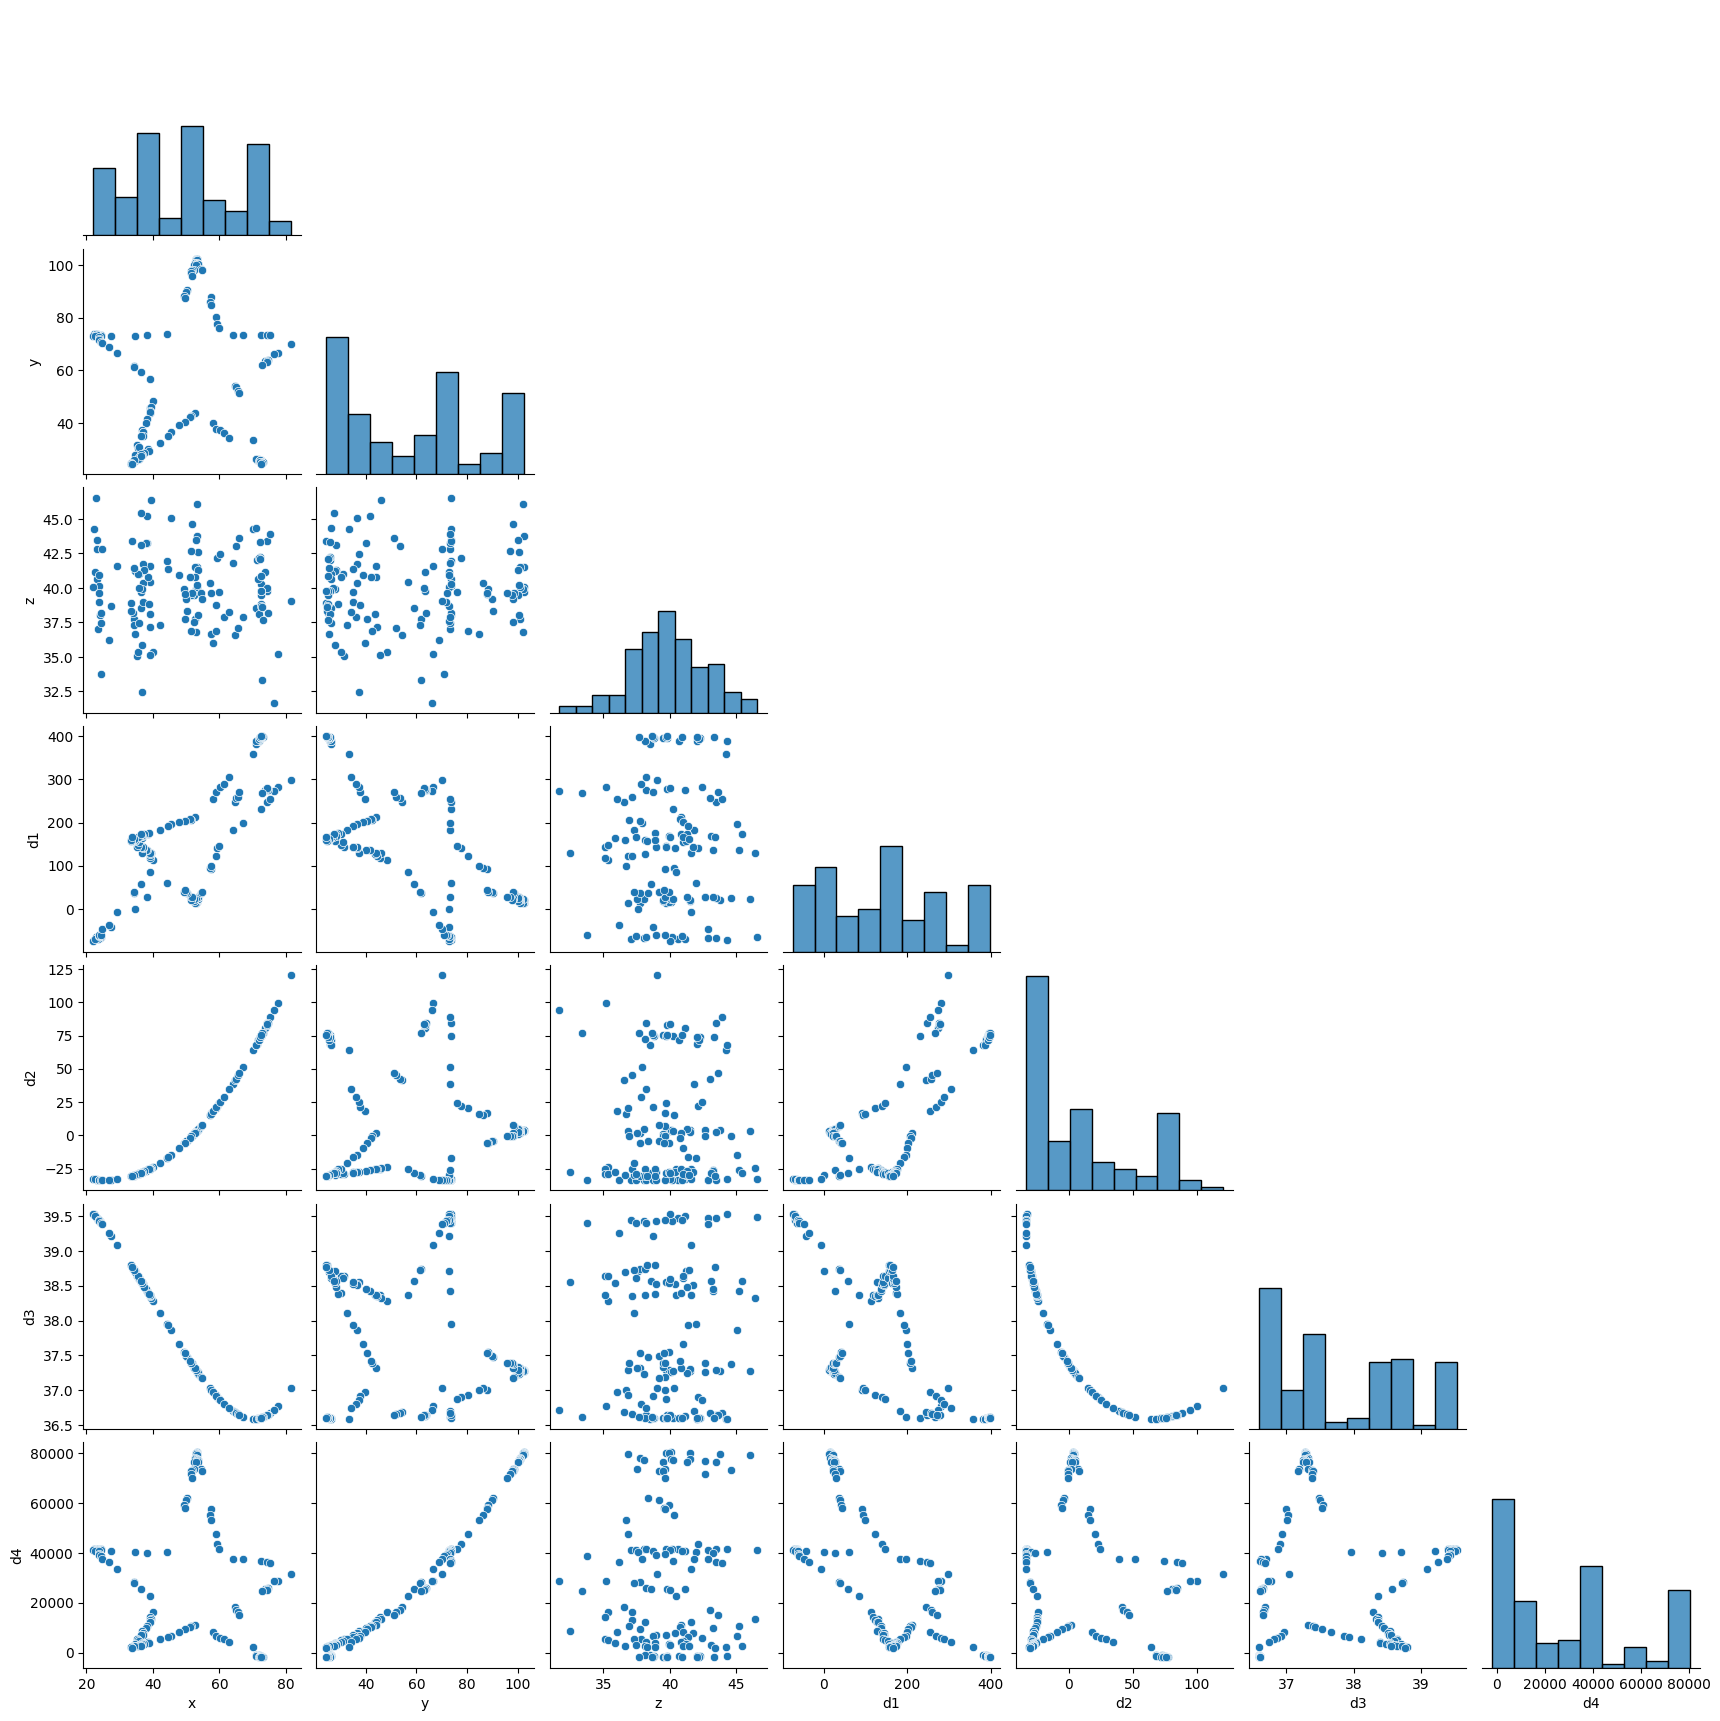

In [146]:
# c=5
sns.pairplot(
    mystery_df[mystery_df["c"] == 5],
    vars=["x", "y", "z", "d1", "d2", "d3", "d4"],
    corner=True,
)

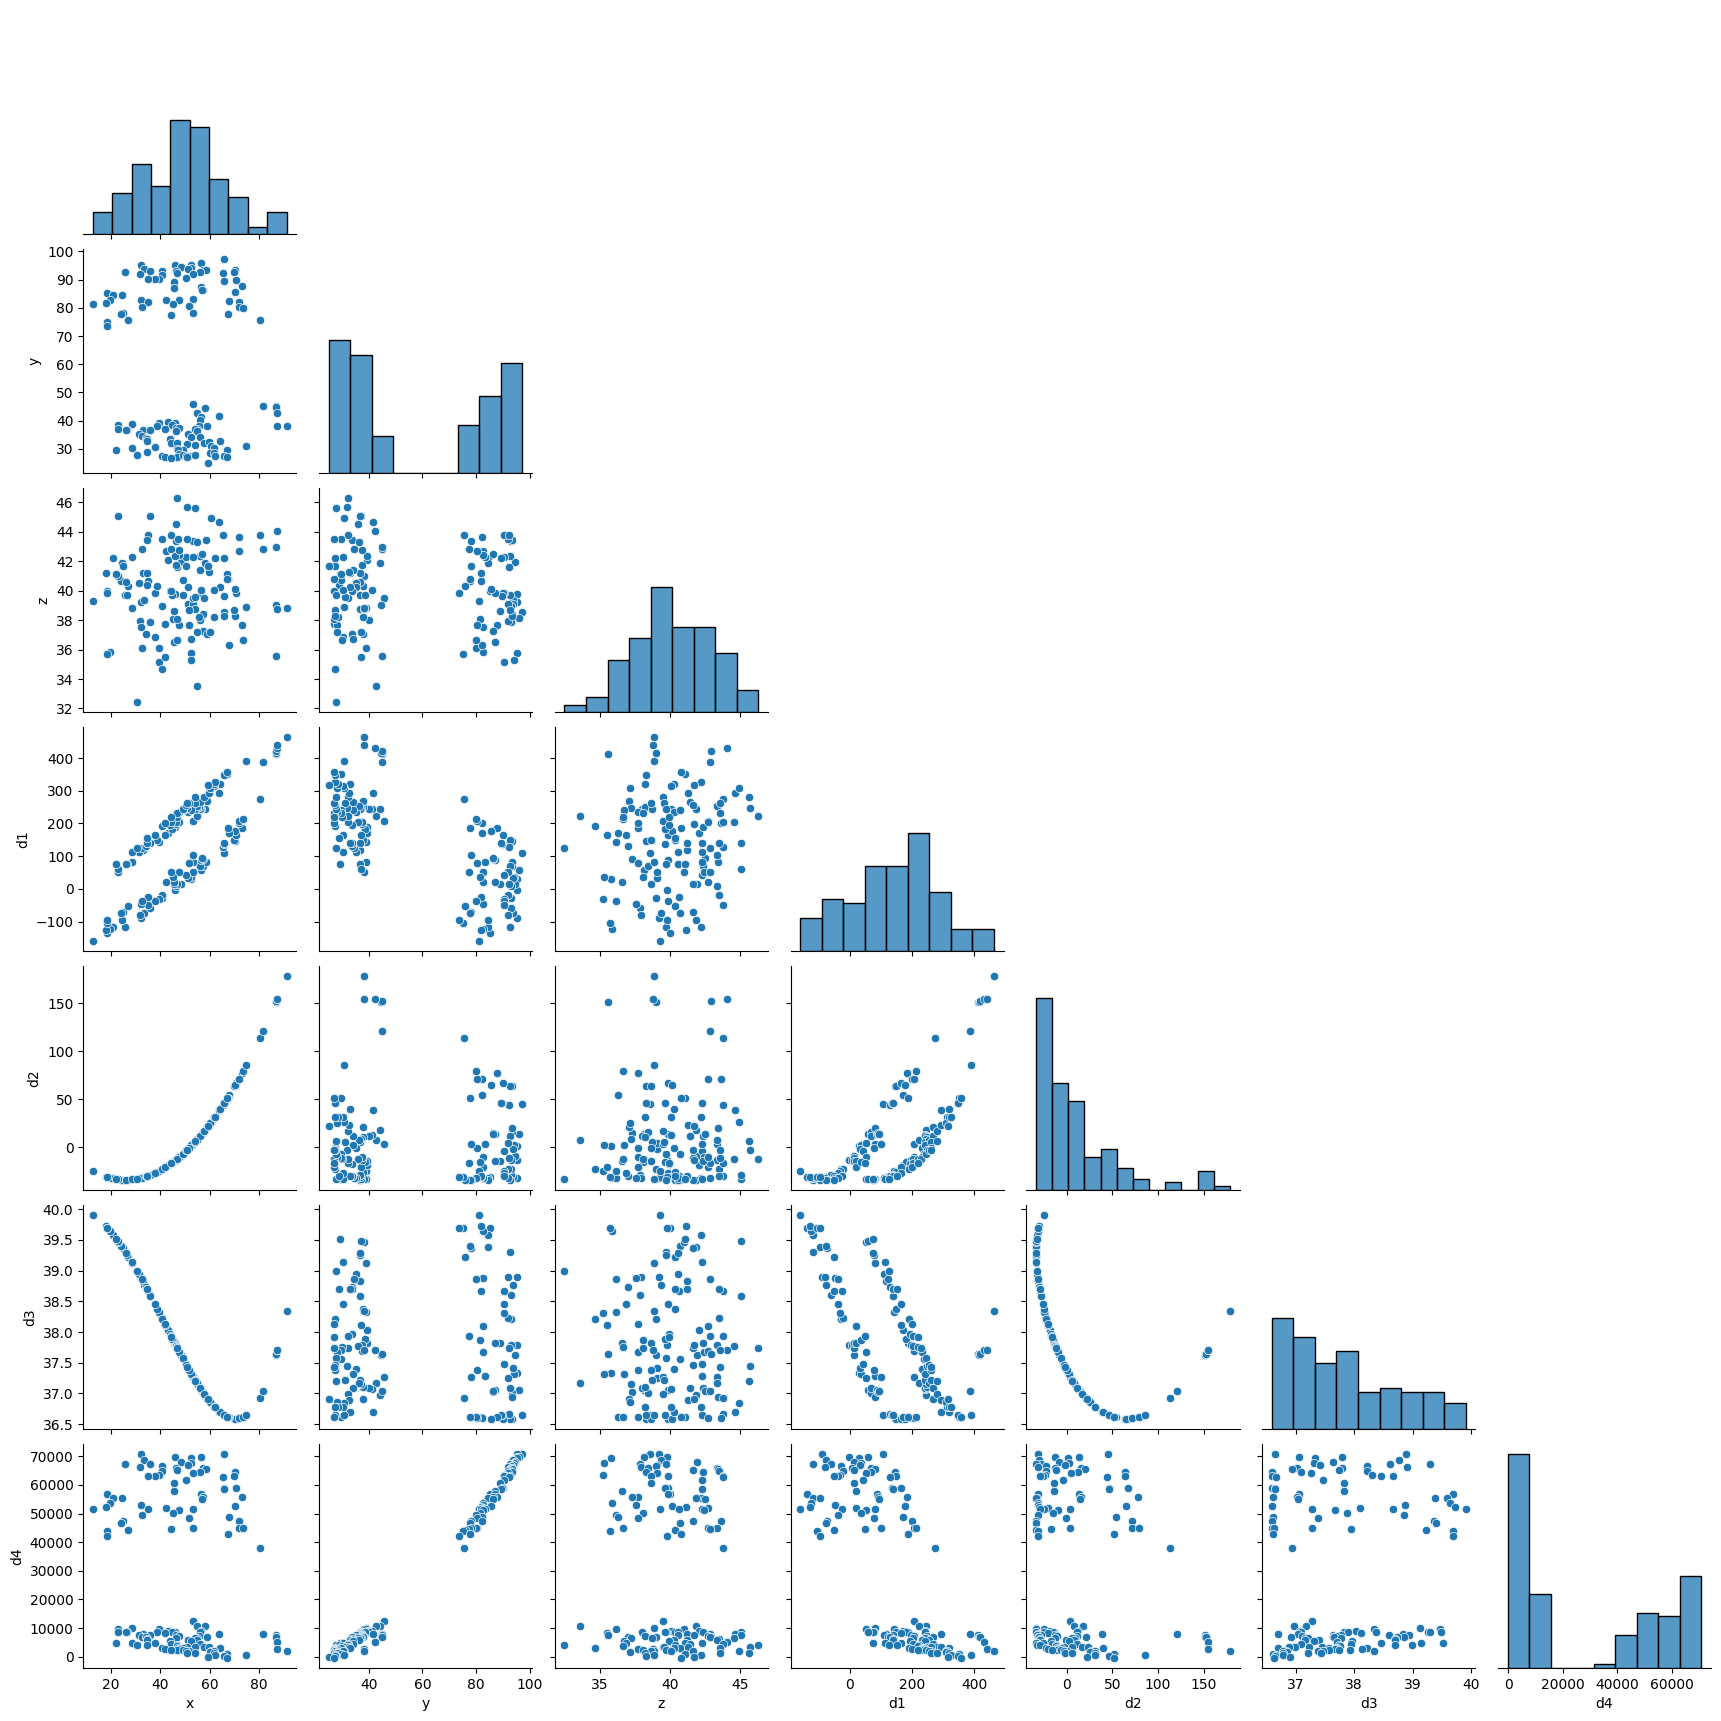

In [147]:
# c=6
sns.pairplot(
    mystery_df[mystery_df["c"] == 6],
    vars=["x", "y", "z", "d1", "d2", "d3", "d4"],
    corner=True,
)

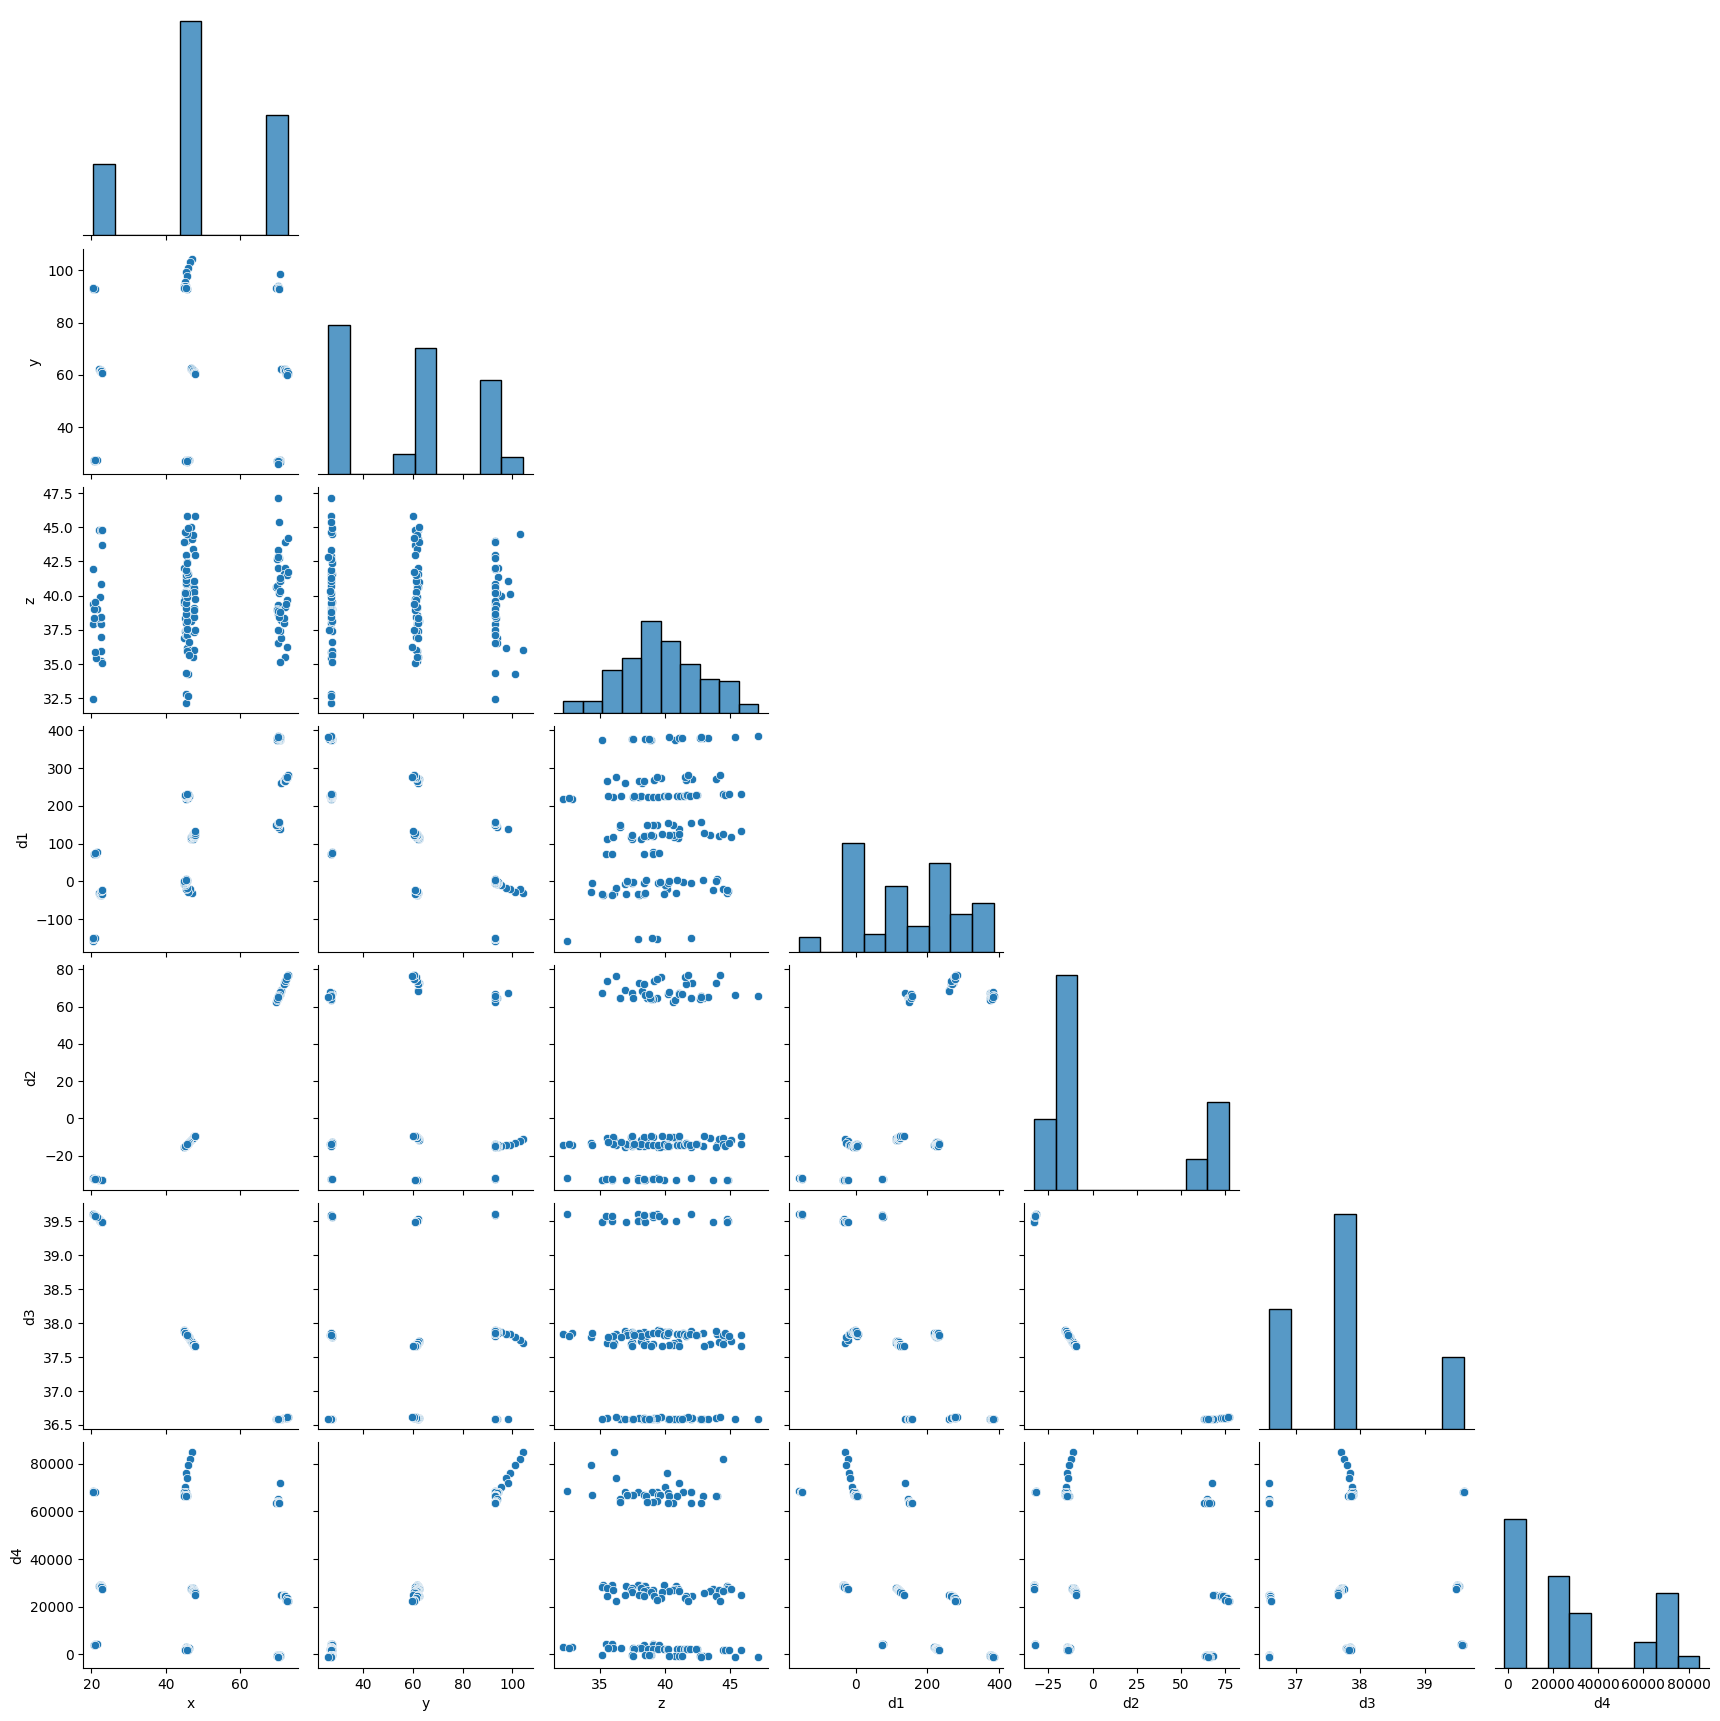

In [148]:
# c=7
sns.pairplot(
    mystery_df[mystery_df["c"] == 7],
    vars=["x", "y", "z", "d1", "d2", "d3", "d4"],
    corner=True,
)

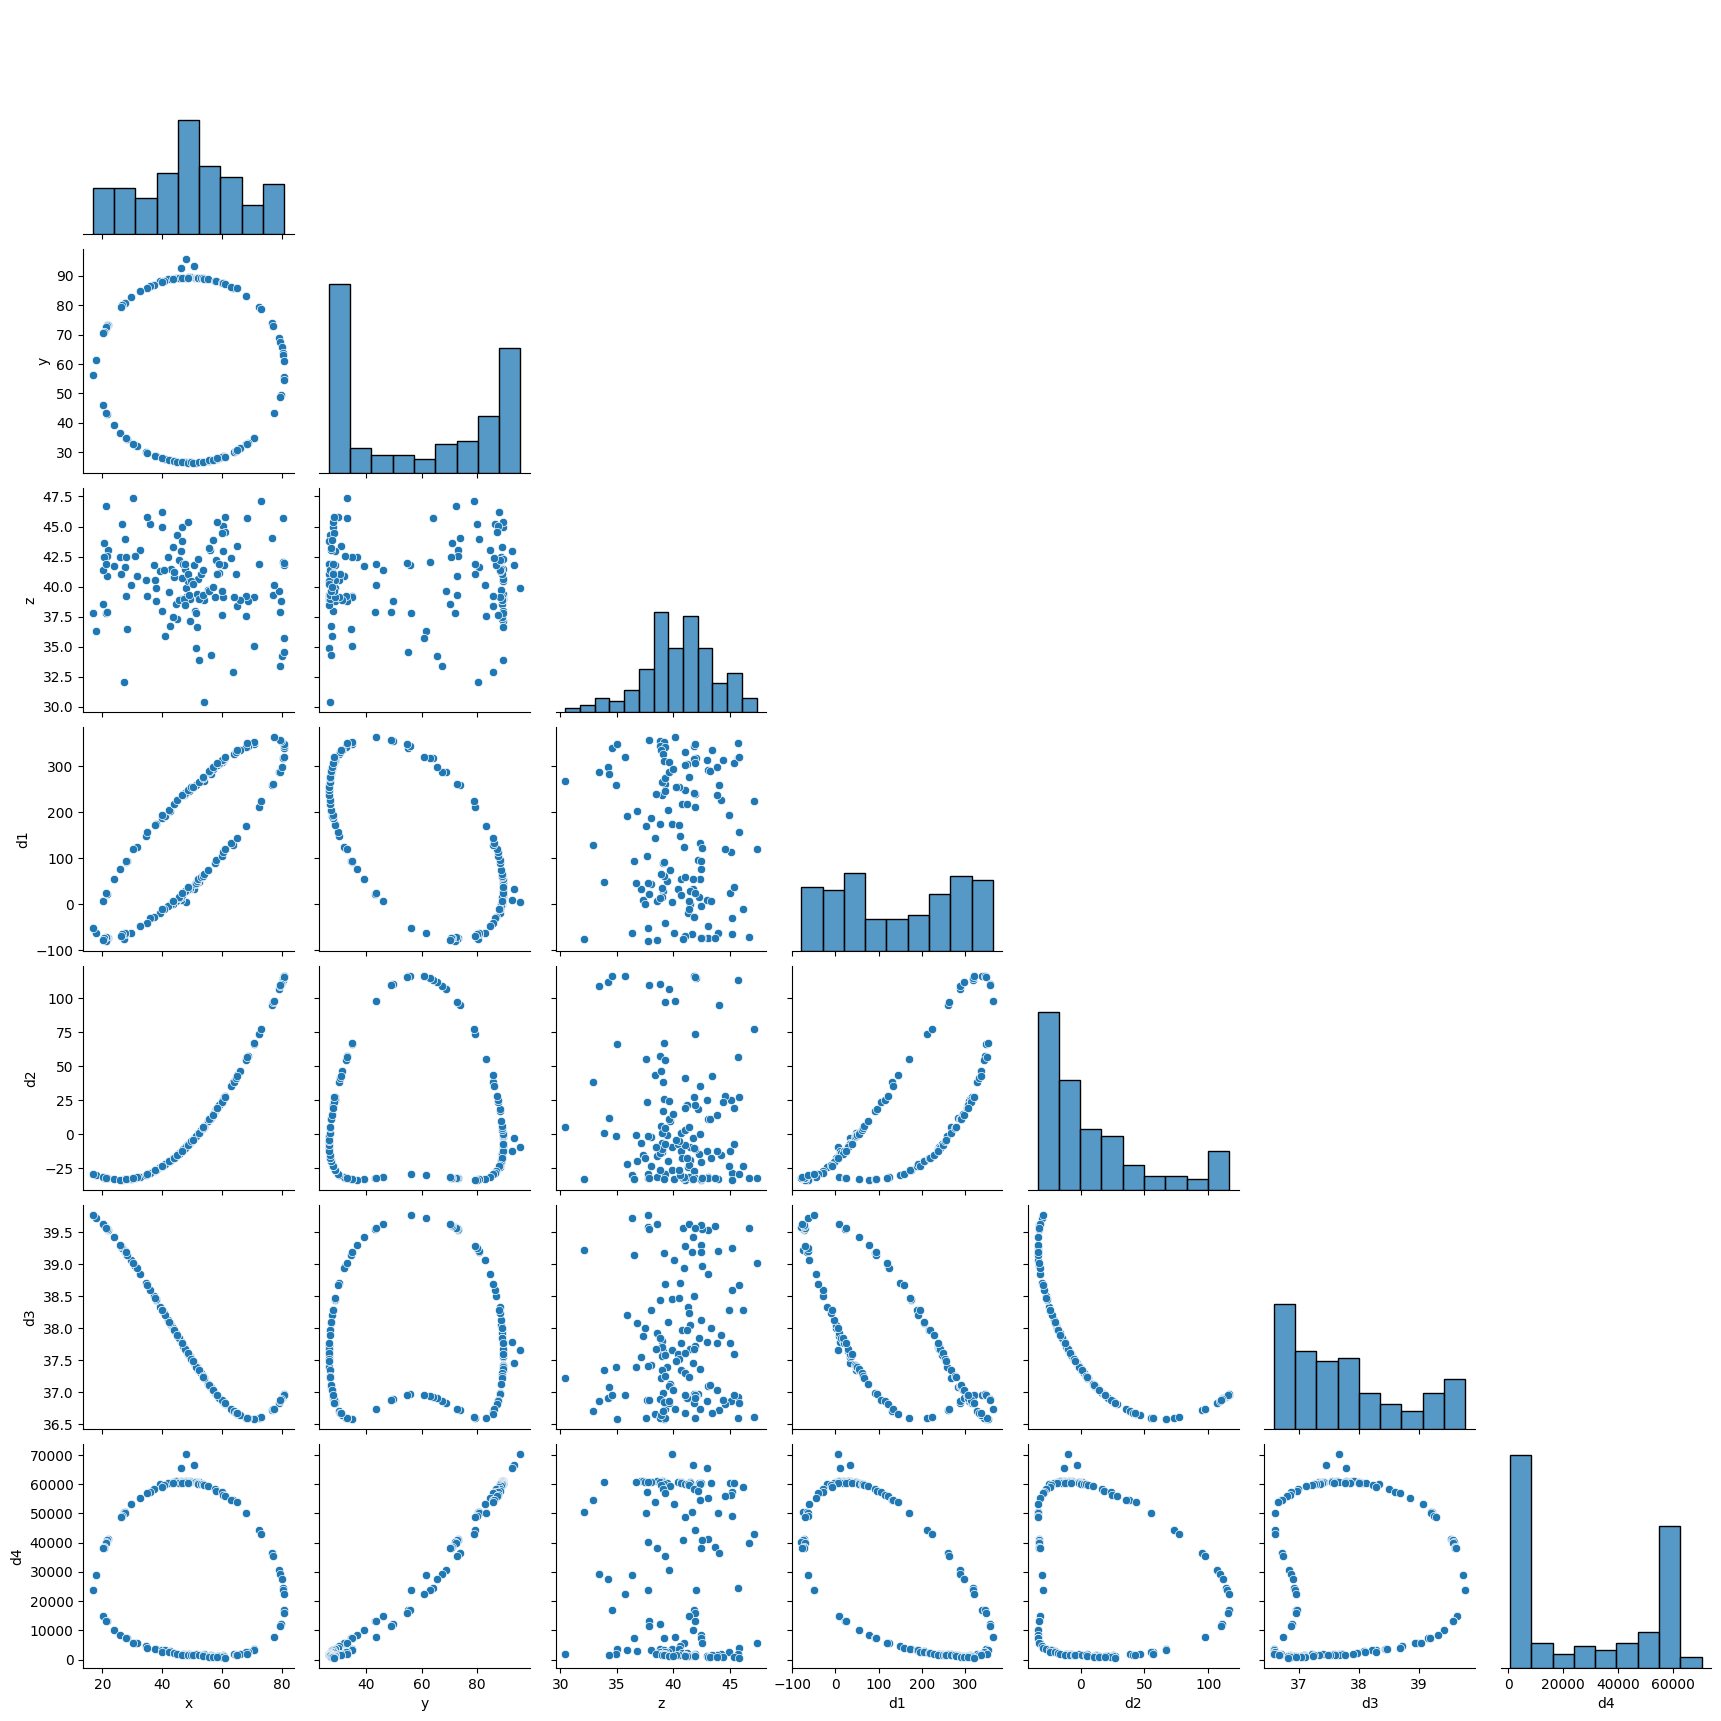

In [149]:
# c=8
sns.pairplot(
    mystery_df[mystery_df["c"] == 8],
    vars=["x", "y", "z", "d1", "d2", "d3", "d4"],
    corner=True,
)

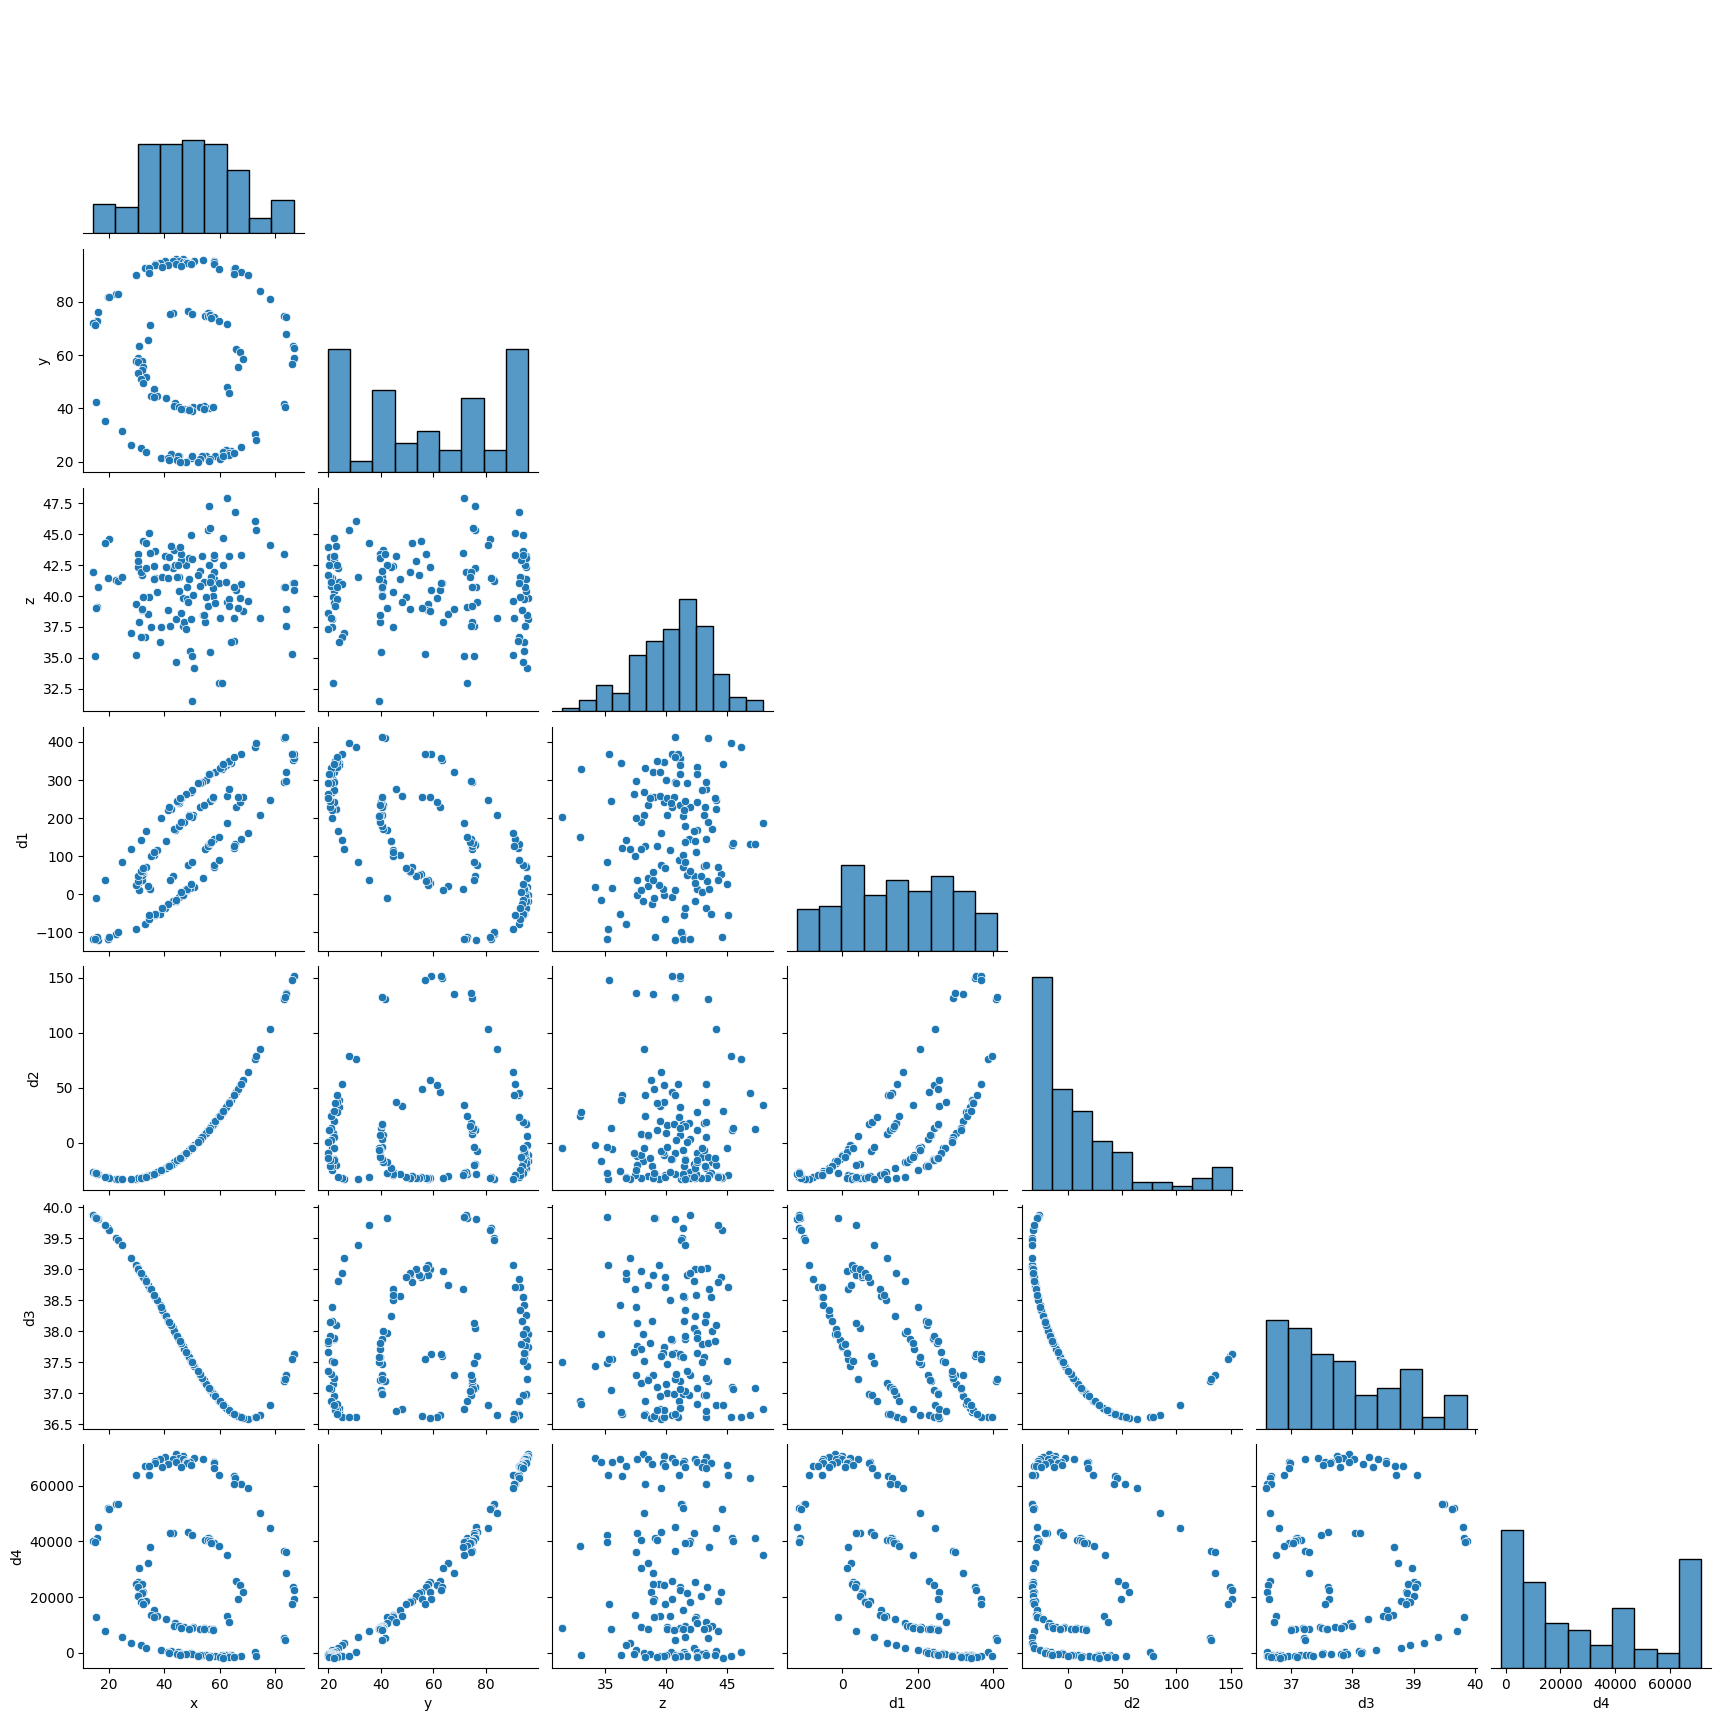

In [150]:
# c=9
sns.pairplot(
    mystery_df[mystery_df["c"] == 9],
    vars=["x", "y", "z", "d1", "d2", "d3", "d4"],
    corner=True,
)

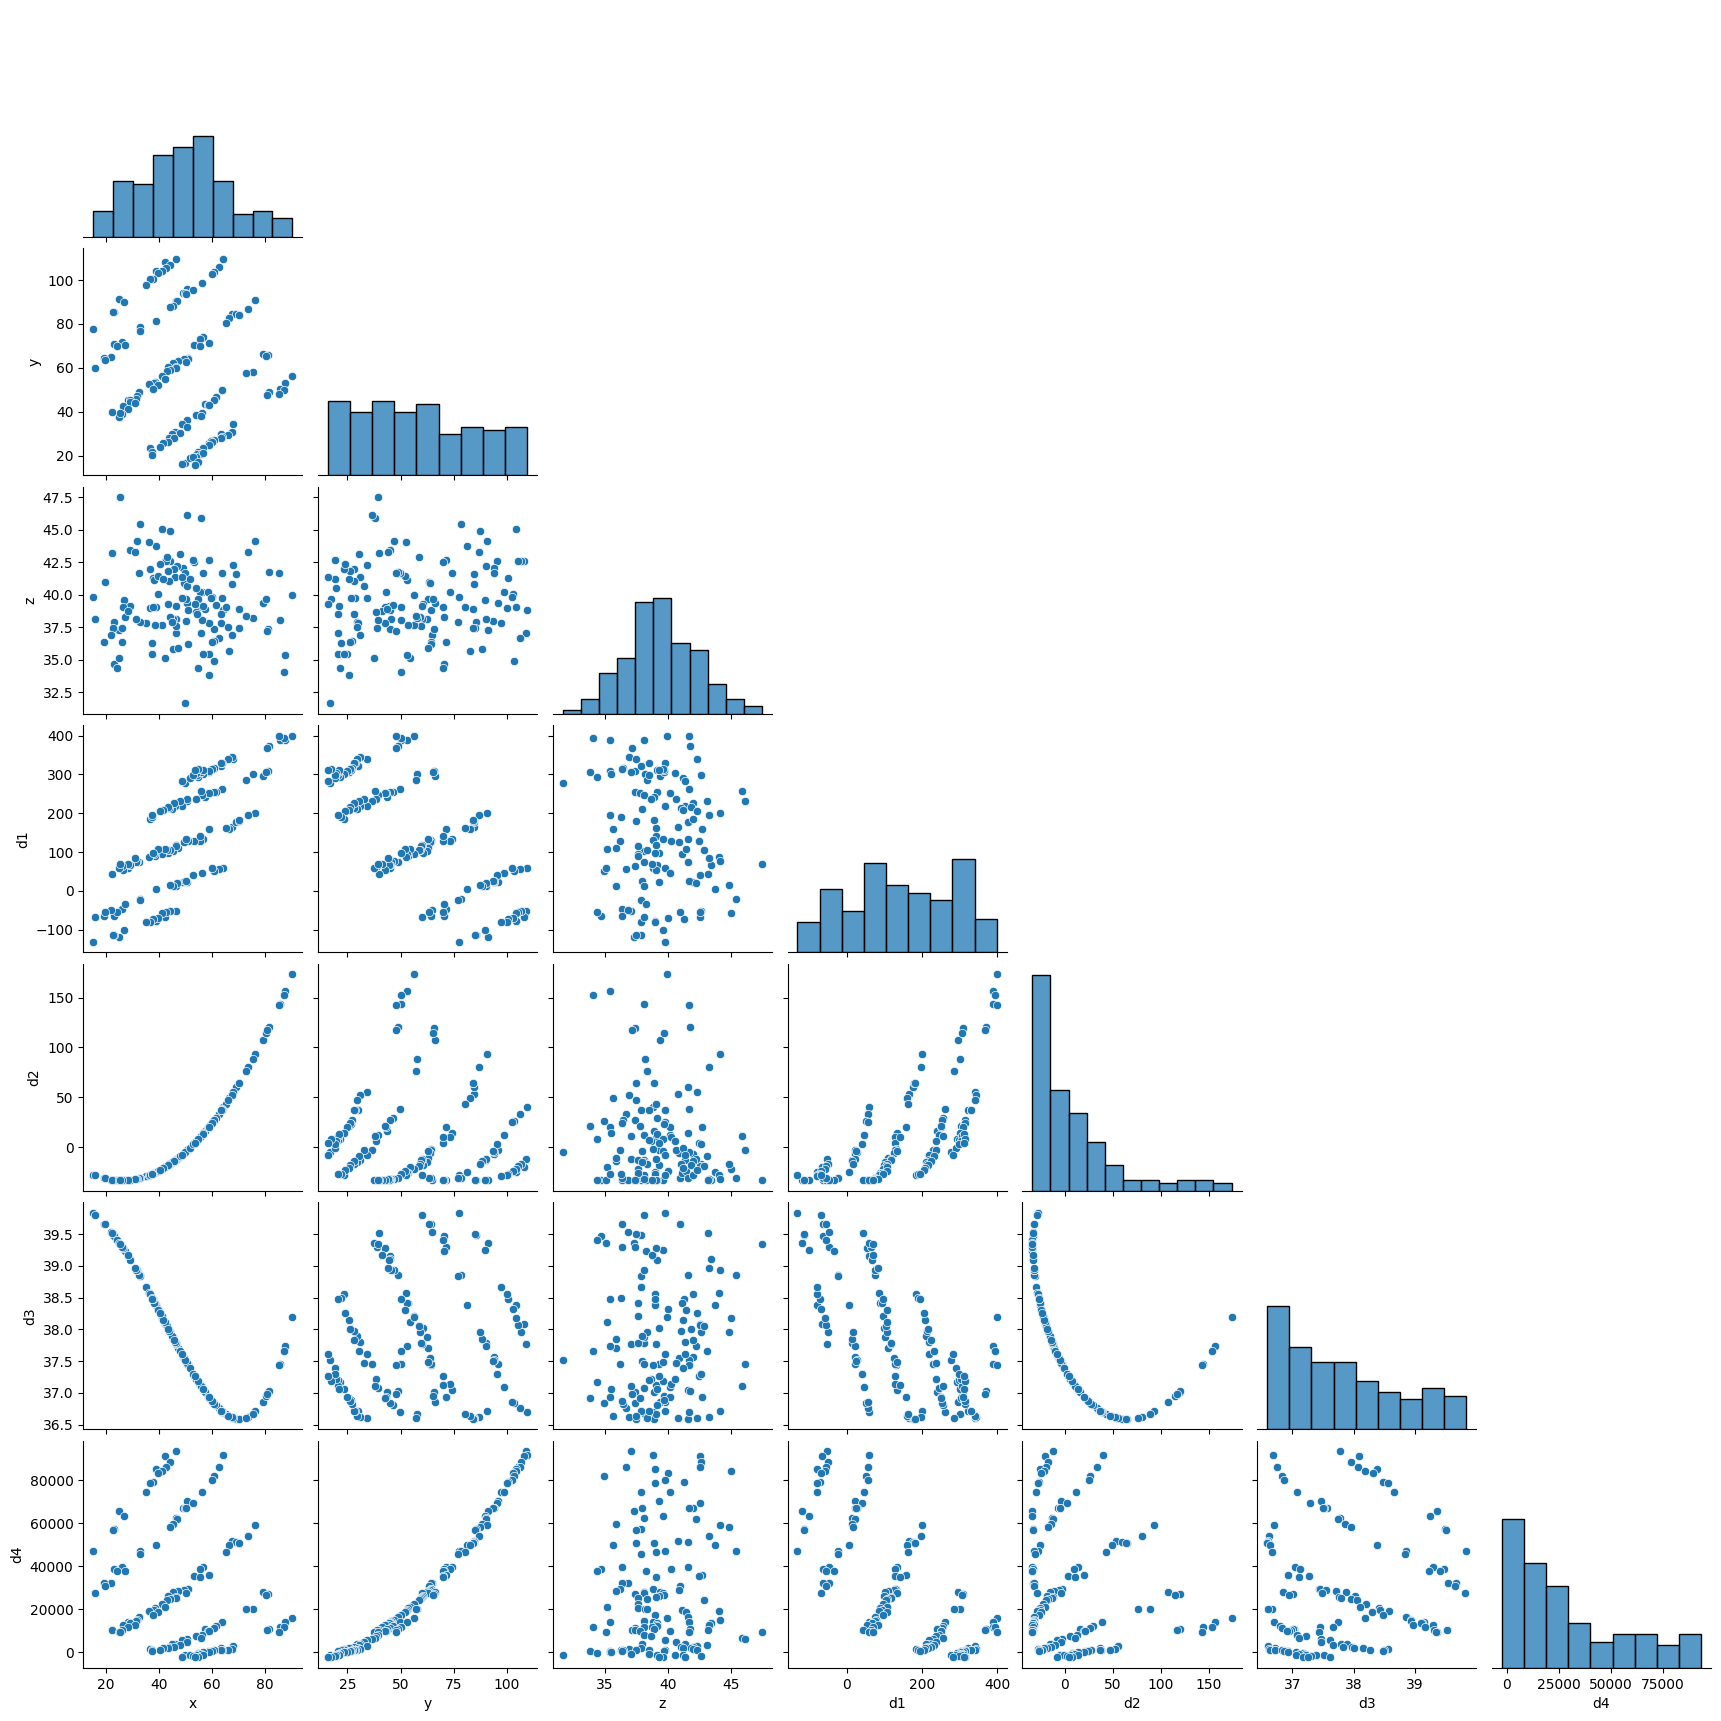

In [151]:
# c=10
sns.pairplot(
    mystery_df[mystery_df["c"] == 10],
    vars=["x", "y", "z", "d1", "d2", "d3", "d4"],
    corner=True,
)

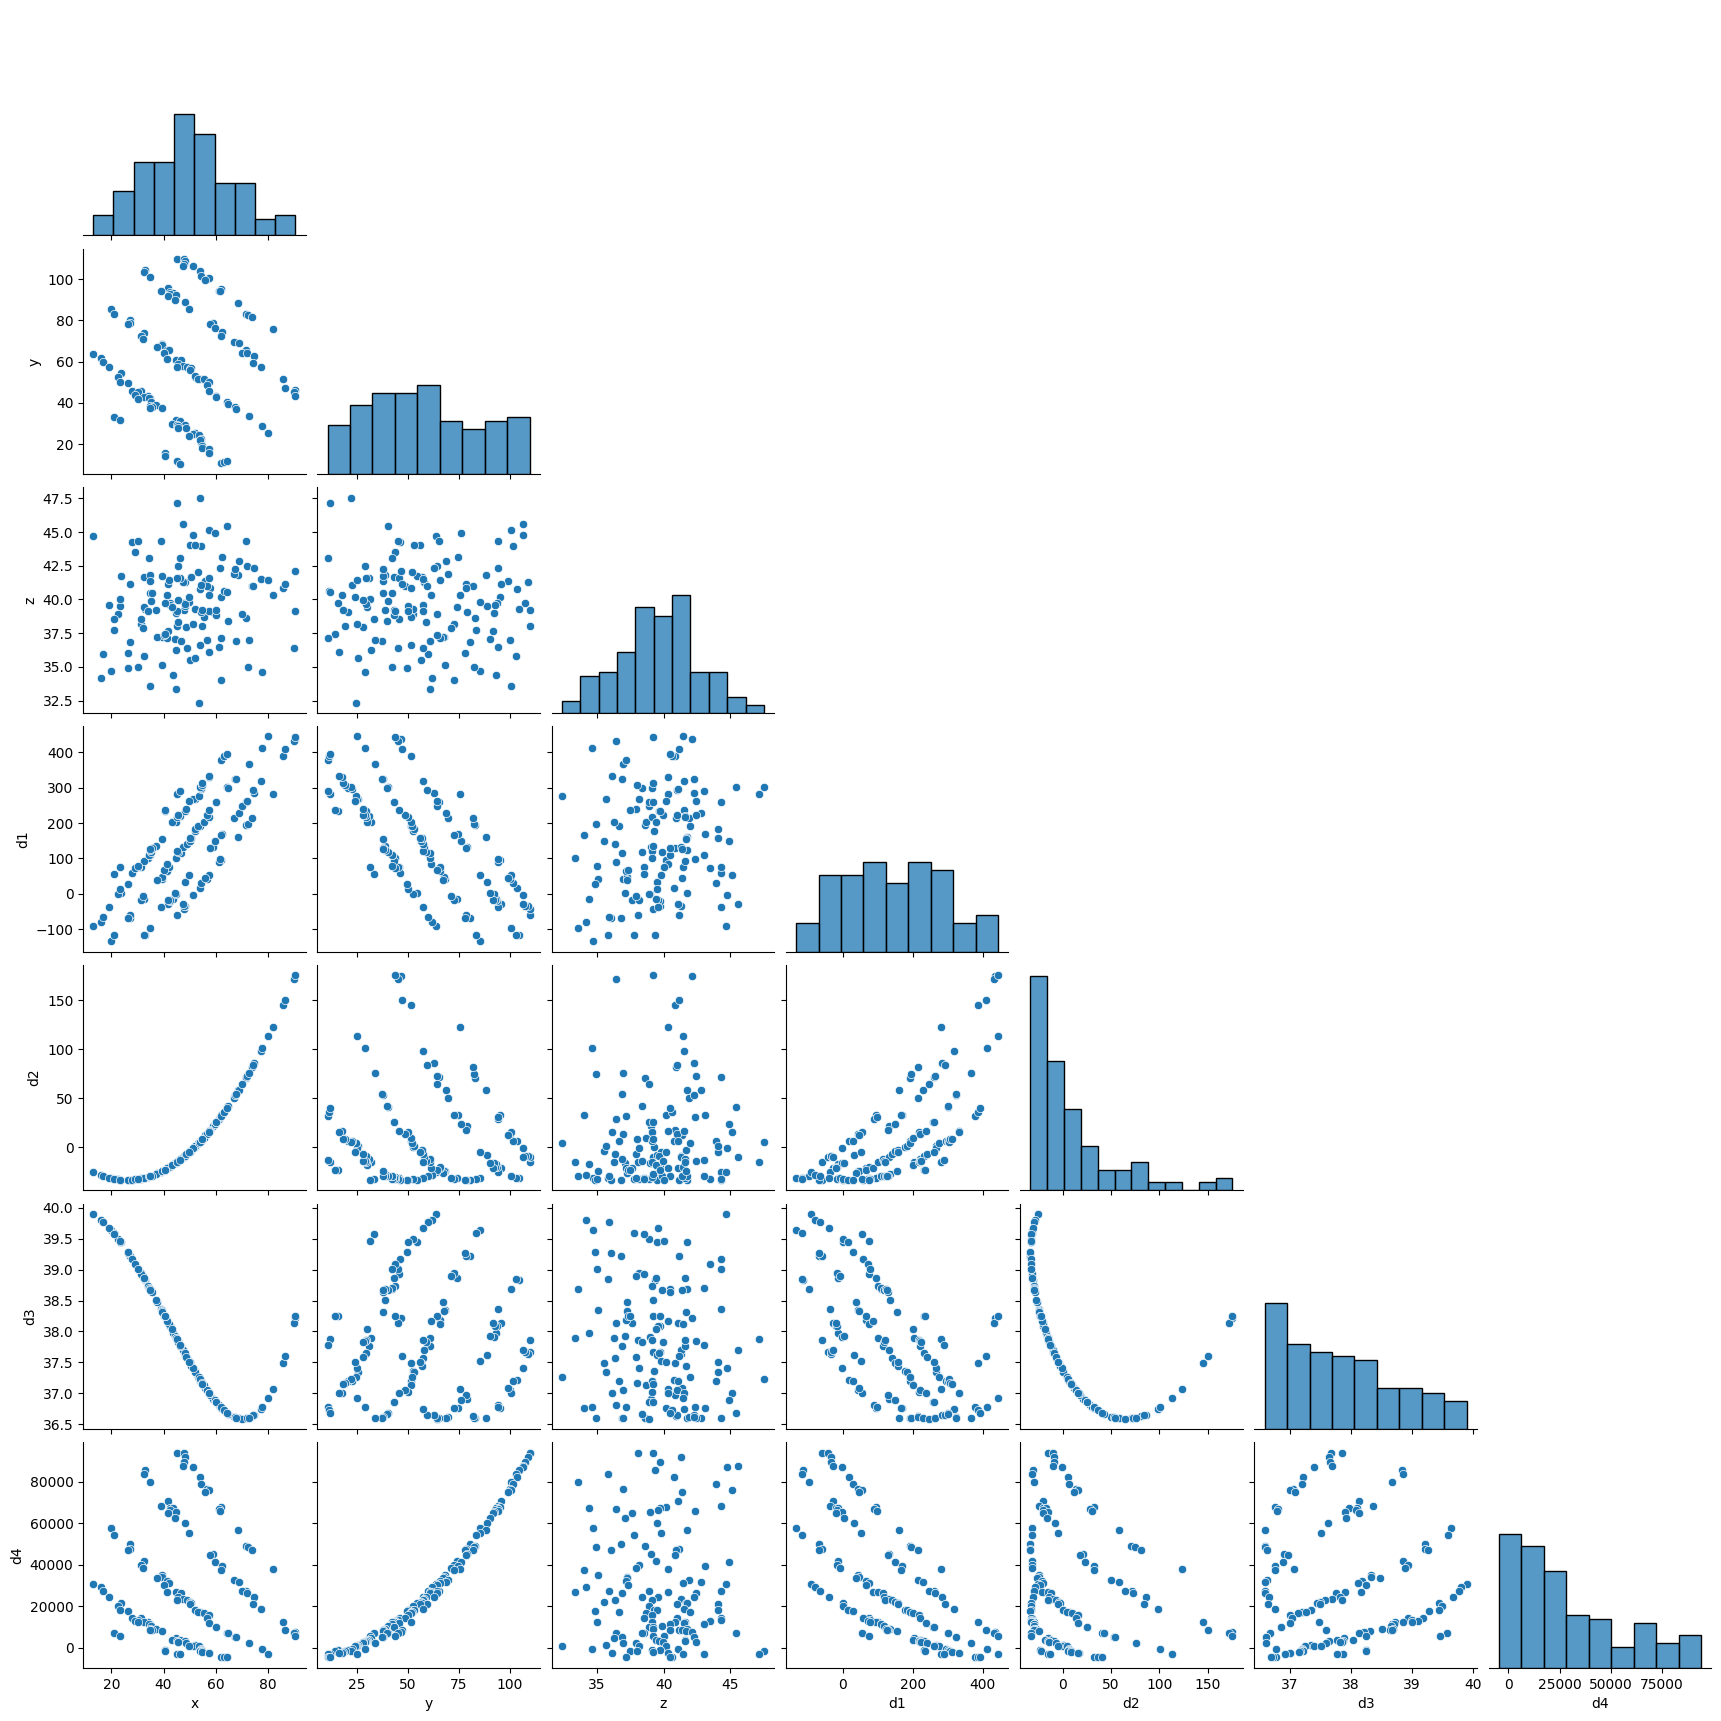

In [152]:
# c=11
sns.pairplot(
    mystery_df[mystery_df["c"] == 11],
    vars=["x", "y", "z", "d1", "d2", "d3", "d4"],
    corner=True,
)

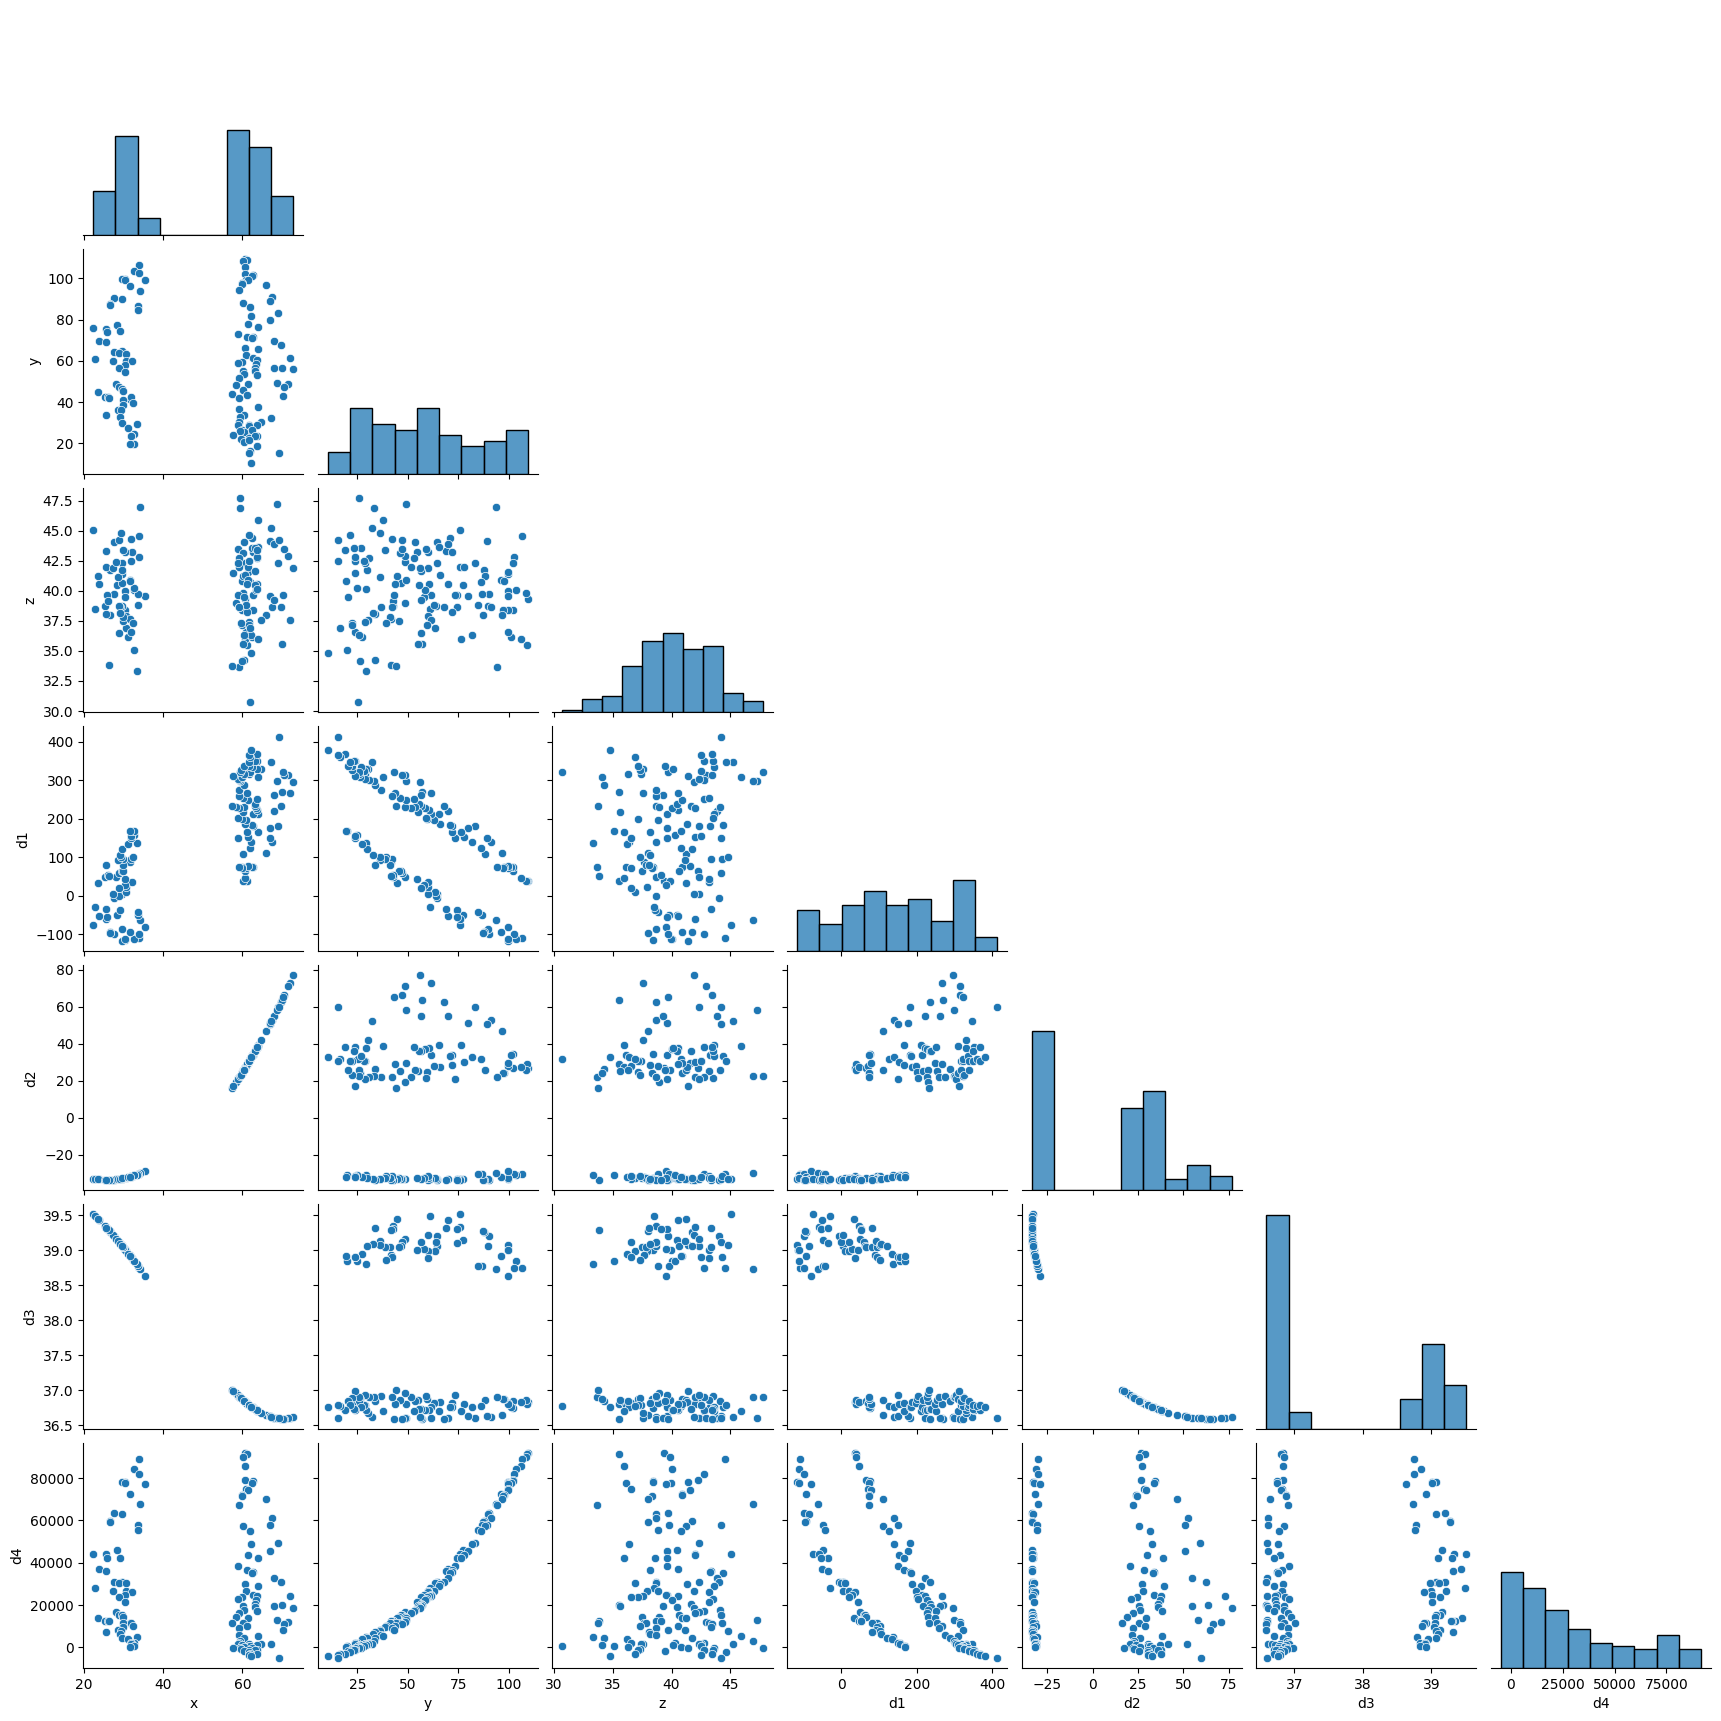

In [153]:
# c=12
sns.pairplot(
    mystery_df[mystery_df["c"] == 12],
    vars=["x", "y", "z", "d1", "d2", "d3", "d4"],
    corner=True,
)

- These graphs patterns/shapes/tracings like the dinosaur, star, circle, double circle and the 'x shape'
- We are not confident with what the other 7 patterns are. Based on appearance, some c values appear related (c=6 and c=12 as well as c=2, c=10, c=11), suggesting there may not be 13 categories
- Based on the pair plots, we have to reason to believe that x and y are good predictors of c. The other variables like z,d1,d2,d3,d4 appear to be noise (z), or transformations like rotations, skew, or zoom in on the patterns. 
- This gives more basis for the hypothesis that c is a categorical variable. We will look into classifier models below

## Logistic Regression Classification I
- Multi-class (13)
- Runs range of C values to identify best regularization parameter

In [154]:
# Split into train, cv, and test datasets using only columns x, y
x_train = mystery_df_train[["x", "y"]]  #'x','y','d1','d2','d3','d4'
y_train = mystery_df_train["c"]

x_eval = mystery_df_eval[["x", "y"]]  #'x','y','d1','d2','d3','d4'
y_eval = mystery_df_eval["c"]

x_test = mystery_df_test[["x", "y"]]  #'x','y','d1','d2','d3','d4'
y_test = mystery_df_test["c"]

In [155]:
# Random C values (regularization parameter) to evaluate
C_values = np.logspace(-5, 2, 100)  #  from 1e-5 to 1e2, 100 values

best_C = None
best_loss = float("inf")
best_model = None
validation_losses = []

In [156]:
warnings.filterwarnings(
    "ignore",
    message=".*'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'.*",
)

# Find best, C value, train models, and evaluate on the validation set
for C in C_values:
    model = LogisticRegression(
        C=C,
        solver="sag",  # optimizer - stochastic average gradient decent
        multi_class="multinomial",  # multiclass
        penalty="l2",  #'l1', 'l2', 'elasticnet'
        max_iter=7000,
        random_state=seed,
        n_jobs=-1,  # use all processors
    )

    model.fit(x_train, y_train)
    y_hat_eval = model.predict_proba(x_eval)

    loss = cross_entropy(y_eval, y_hat_eval)
    validation_losses.append(loss)

    # Check if this is the best C
    if loss < best_loss:
        best_loss = loss
        best_C = C
        best_model = model  # Store the best model temporarily


In [157]:
print(f"\nOptimal C found on validation set: {best_C:.6f} (Log Loss: {best_loss:6f})")


Optimal C found on validation set: 0.000010 (Log Loss: 2.586104)


In [158]:
# display results
y_hat_test = best_model.predict_proba(x_test)
test_loss = cross_entropy(y_test, y_hat_test)
test_accuracy = best_model.score(x_test, y_test)

print("\nFinal Model Performance on Test Set:")
print(f"\tTest Log Loss: {test_loss:.4f}")
print(f"\tTest Accuracy: {test_accuracy:.4f}")


Final Model Performance on Test Set:
	Test Log Loss: 2.5850
	Test Accuracy: 0.0412


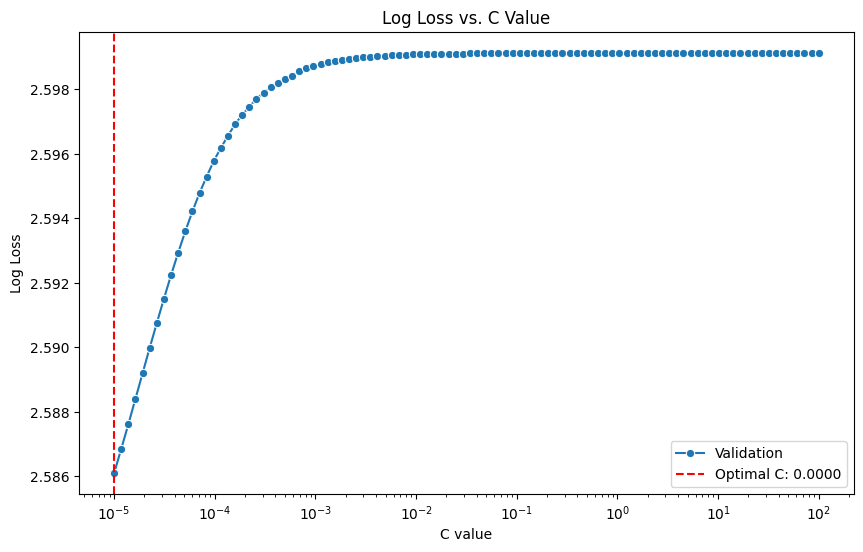

In [159]:
# Plot log-loss vs C
plot_data = pd.DataFrame({"C_value": C_values, "Log_Loss": validation_losses})

plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=plot_data, x="C_value", y="Log_Loss", marker="o", label="Validation"
)

# Highlight the best C value found
plt.axvline(x=best_C, color="r", linestyle="--", label=f"Optimal C: {best_C:.4f}")

ax.set_xlabel("C value")
ax.set_ylabel("Log Loss")
ax.set_title("Log Loss vs. C Value")
ax.set_xscale("log")

plt.legend()
plt.show()


## Logistic Regression Classification II
- Implements scaling
- Uses binary classification, focusing only two c values, one of which is c=0
- Initial binary classification attempt has imbalanced, led to high accuracy but likely is only due to guessing majority classification 
- Uses defaults

In [ ]:
def get_logistic_regression_estimator(
    X_train: pd.DataFrame, y_train: pd.Series, seed: int = 4
) -> LogisticRegression:
    """
    Returns Logistic Regression Model
    Scales training data
    """

    # Scale
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)

    ## logistic regression model
    return LogisticRegression(random_state=seed).fit(X_train_scaled, y_train)

In [161]:
## run for all combinations of columns to find best test score
def train_test(
    train_columns: list[str],
    df_train: pd.DataFrame,
    y_train: pd.Series,
    df_test: pd.DataFrame,
    y_test: pd.Series,
    seed: int = 4,
) -> list[tuple[float, float, list[str]]]:
    """
    Trains and tests for all combinations of training columns
    Returns list of test score, train score, and assocated columns in descending order
    """

    scores = []
    max_size = len(train_columns)
    for r in range(max_size):
        for columns in combinations(train_columns, r=r + 1):
            columns = list(columns)
            X_train = df_train[columns]

            clf = get_logistic_regression_estimator(X_train, y_train, seed)

            ## train score
            X_test = df_train[columns]
            train_score = clf.score(X_test.values, y_train.values)

            ## test score
            X_test = df_test[columns]
            score = clf.score(X_test.values, y_test.values)  # accuracy

            scores.append((score, train_score, columns))

    # sort
    return sorted(scores, key=lambda x: x[0], reverse=True)

In [162]:
# Run c=0 classification with "balanced" dataset by choosing random second class
y_column = "c"
train_columns = mystery_df.columns[:-1]  # x:d4

for other_c in range(1, 13):
    # split into two binary df
    mask = (mystery_df["c"] == 0) | (mystery_df["c"] == other_c)
    df_binary = mystery_df[mask]

    df_train, df_test = train_test_split(
        df_binary, train_size=train_size, random_state=seed
    )
    scores = train_test(
        train_columns, df_train, df_train[y_column], df_test, df_test[y_column]
    )
    print(other_c, scores[0])

1 (0.55, 0.5, ['x', 'z', 'd3', 'd4'])
2 (0.55, 0.48214285714285715, ['x', 'z', 'd1', 'd2'])
3 (0.55, 0.5, ['x', 'z', 'd4'])
4 (0.55, 0.48660714285714285, ['y'])
5 (0.5833333333333334, 0.5089285714285714, ['x', 'y', 'z', 'd2'])
6 (0.55, 0.6071428571428571, ['y', 'z', 'd1'])
7 (0.5833333333333334, 0.5223214285714286, ['d1', 'd4'])
8 (0.6, 0.48660714285714285, ['y', 'z', 'd1', 'd2', 'd3'])
9 (0.6, 0.48660714285714285, ['x', 'z', 'd1', 'd3'])
10 (0.7, 0.45089285714285715, ['x', 'z', 'd1'])
11 (0.5666666666666667, 0.47767857142857145, ['x', 'y', 'd3'])
12 (0.65, 0.48660714285714285, ['d1', 'd3'])


- binary classification with c=0 and c=10 observed best accuracy for features x, z, d1


In [163]:
# Look into additional metrics for c=0, c=10
columns = ["x", "z", "d1"]
pos_label = 0  # c value for metrics

## mask df with c=0, c=10
mask = (mystery_df["c"] == 0) | (mystery_df["c"] == 10)
df_binary = mystery_df[mask]

## split
df_train, df_test = train_test_split(
    df_binary, train_size=train_size, random_state=seed
)

## get model
X_train = df_train[columns]
y_train = df_train[y_column]
clf = get_logistic_regression_estimator(X_train, y_train)

## predict
X_test = df_test[columns]
y_true = df_test[y_column]
y_pred = clf.predict(X_test.values)

# metrics
recall = metrics.recall_score(y_true, y_pred, pos_label=pos_label)
precision = metrics.precision_score(y_true, y_pred, pos_label=pos_label)
f1 = metrics.f1_score(y_true, y_pred, pos_label=pos_label)

print(f"{precision=:0.2f}, {recall=:0.2f}, {f1=:0.2f}")

precision=0.73, recall=0.90, f1=0.80


- For c=0, precision=0.73, recall=0.90, f1=0.80
- For c=10, precision=0.56, recall=0.26, f1=0.36